In [134]:
# Loading necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [135]:
# checking the versions of vaious libraries used
print('version of numpy is', np.__version__)
print('version of pandas is', pd.__version__)
print('version of seaborn is',sns.__version__)

version of numpy is 1.24.3
version of pandas is 2.0.3
version of seaborn is 0.12.2


# Problem 1
## Background Information
In today's financial landscape, managing debt obligations to maintain a favorable credit standing while driving sustainable growth has become increasingly challenging for businesses. As a result, investors and financial institutions must carefully evaluate companies that can effectively navigate financial complexities while maintaining stability and profitability. A company's balance sheet is a crucial tool in this assessment, offering a detailed snapshot of its assets, liabilities, and shareholders' equity. This comprehensive overview provides valuable insights into a business's financial health and operational efficiency, supporting informed decision-making and strategic planning.
## Business Context
The current financial challenges have created a unique opportunity for venture capitalists. A group of them has collaborated to develop a Financial Health Assessment Tool designed to perform Debt Management Analysis and Credit Risk Evaluation on historical financial statements. This tool aims to generate valuable insights that will support informed decision-making.
## Problem Statement
The objective of this project is to analyze financial metrics data from various companies to identify potential challenges in their financial performance and develop proactive strategies for effective risk mitigation.
## Data Dictionary
* Networth Next Year: Net worth of the customer in the next year
* Total assets: Total assets of customer
* Net worth: Net worth of the customer of the present year
* Total income: Total income of the customer
* Change in stock: Difference between the current value of the stock and the value of stock in the last trading day
* Total expenses: Total expenses done by the customer
* Profit after tax: Profit after tax deduction
* PBDITA: Profit before depreciation, income tax, and amortization
* PBT: Profit before tax deduction
* Cash profit: Total Cash profit
* PBDITA as % of total income: PBDITA / Total income
* PBT as % of total income: PBT / Total income
* PAT as % of total income: PAT / Total income
* Cash profit as % of total income: Cash Profit / Total income
* PAT as % of net worth: PAT / Net worth
* Sales: Sales done by the customer
* Income from financial services: Income from financial services
* Other income: Income from other sources
* Total capital: Total capital of the customer
* Reserves and funds: Total reserves and funds of the customer
* Borrowings: Total amount borrowed by the customer
* Current liabilities & provisions: current liabilities of the customer
* Deferred tax liability: Future income tax customer will pay because of the current transaction
* Shareholders funds: Amount of equity in a company which belongs to shareholders
* Cumulative retained profits: Total cumulative profit retained by customer
* Capital employed: Current asset minus current liabilities
* TOL/TNW: Total liabilities of the customer divided by Total net worth
* Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth
* Contingent liabilities / Net worth (%): Contingent liabilities / Net worth
* Contingent liabilities: Liabilities because of uncertain events
* Net fixed assets: The purchase price of all fixed assets
* Investments: Total invested amount
* Current assets: Assets that are expected to be converted to cash within a year
* Net working capital: Difference between the current liabilities and current assets
* Quick ratio (times): Total cash divided by current liabilities
* Current ratio (times): Current assets divided by current liabilities
* Debt to equity ratio (times): Total liabilities divided by its shareholder equity
* Cash to current liabilities (times): Total liquid cash divided by current liabilities
* Cash to average cost of sales per day: Total cash divided by the average cost of the sales
* Creditors turnover: Net credit purchase divided by average trade creditors
* Debtors turnover: Net credit sales divided by average accounts receivable
* Finished goods turnover: Annual sales divided by average inventory
* WIP turnover: The cost of goods sold for a period divided by the average inventory for that period
* Raw material turnover: Cost of goods sold is divided by the average inventory for the same period
* Shares outstanding: Number of issued shares minus the number of shares held in the company
* Equity face value: cost of the equity at the time of issuing
* EPS: Net income divided by the total number of outstanding share
* Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year
* Total liabilities: Sum of all types of liabilities
* PE on BSE: Company's current stock price divided by its earnings per share
## Loading Data

In [136]:
company_data = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/FRA/Company_data.csv')

## Data Overview

In [137]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")
    
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")
    
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")
    
    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")
    
    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of duplicate rows: {df.duplicated().sum()}")
    print("\n")
    
    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [138]:
data_overview(company_data)

a glimpse of the data
----------------------------------------------------------------------------


,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3000,827.6000,336.5000,534.1000,13.5000,508.7000,38.9000,124.4000,64.6000,...,5.6500,3.9900,3.3700,14.8700,8760056.0000,10.0000,4.4400,4.4400,827.6000,NaN
1,2,36.2000,67.7000,24.3000,137.9000,-3.7000,131.0000,3.2000,5.5000,1.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,67.7000,NaN
2,3,84.0000,238.4000,78.9000,331.2000,-18.1000,309.2000,3.9000,25.8000,10.5000,...,2.5100,17.6700,8.7600,8.3500,NaN,NaN,0.0000,0.0000,238.4000,NaN
3,4,2041.4000,6883.5000,1443.3000,8448.5000,212.2000,8482.4000,178.3000,418.4000,185.1000,...,1.9100,18.1400,18.6200,11.1100,10000000.0000,10.0000,17.6000,17.6000,6883.5000,NaN
4,5,41.8000,90.9000,47.0000,388.6000,3.4000,392.7000,-0.7000,7.2000,-0.6000,...,68.0000,45.8700,28.6700,19.9300,107315.0000,100.0000,-6.5200,-6.5200,90.9000,NaN




shape of the dataset
----------------------------------------------------------------------------


(4256, 51)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Num,4256.0000,2128.5000,1228.7457,1.0000,1064.7500,2128.5000,3192.2500,4256.0000
Networth Next Year,4256.0000,1344.7409,15936.7432,-74265.6000,3.9750,72.1000,330.8250,805773.4000
Total assets,4256.0000,3573.6172,30074.4434,0.1000,91.3000,315.5000,1120.8000,1176509.2000
Net worth,4256.0000,1351.9496,12961.3117,0.0000,31.4750,104.8000,389.8500,613151.6000
Total income,4025.0000,4688.1898,53918.9466,0.0000,107.1000,455.1000,1485.0000,2442828.2000
Change in stock,3706.0000,43.7025,436.9150,-3029.4000,-1.8000,1.6000,18.4000,14185.5000
Total expenses,4091.0000,4356.3011,51398.0871,-0.1000,96.8000,426.8000,1395.7000,2366035.3000
Profit after tax,4102.0000,295.0506,3079.9021,-3908.3000,0.5000,9.0000,53.3000,119439.1000
PBDITA,4102.0000,605.9406,5646.2306,-440.7000,6.9250,36.9000,158.7000,208576.5000
PBT,4102.0000,410.2590,4217.4153,-3894.8000,0.8000,12.6000,74.1750,145292.6000




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       

None



missing values
----------------------------------------------------------------------------


Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita



checking for duplicates
----------------------------------------------------------------------------
number of duplicate rows: 0




The statistical summary currently displays inconsistent decimal ranges, with some values appearing in scientific notation ('e'). To improve clarity and uniformity, we will round all values to two decimal points.

In [139]:
pd.options.display.float_format = '{:.2f}'.format   
print("statistical summary")
print("----------------------------------------------------------------------------")
company_data.describe().T

statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Num,4256.00,2128.50,1228.75,1.00,1064.75,2128.50,3192.25,4256.00
Networth Next Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change in stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit after tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60


checking for missing values in proportion terms

In [140]:
company_data.isnull().sum().sum()

17778

In [141]:
company_data.size

217056

In [142]:
print('Proportion of missing values')
print(round(17778*100/217056,2),'%')

Proportion of missing values
8.19 %


##### Key Observations
1. Column names are messy (has spaces) are inconsistent which we will have to fix.
2. There are 4256 rows and 51 columns in the dataset.
3. The dataset comprises financial data, and as expected, all columns have numeric data types (either integers or floats). This consistency indicates that the dataset is free from junk data.
4. There are missing values in the dataset, on checking more thoroughly missing values account for over 8% of the data in the dataset.
5. The dataset does not include a predefined target variable. However, given the problem's objective of identifying companies likely to face financial difficulties, we will define a company as a "defaulter" if its net worth in the following year is negative.
6. Column 'Num' contains serial numbers which are irrelevant for our analysis and equity face value remains constant which makes it irrelevant, additionally, 'Networth Next Year' will be used to extract the target variable. We drop both these columns.
## Data Pre-processing
### Fixing messy column names

In [143]:
company_data.columns = company_data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [144]:
company_data.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       '

### Creating target variable default.

In [145]:
company_data['default'] = np.where((company_data['Networth_Next_Year'] > 0), 0, 1)

In [146]:
company_data[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,395.30
1,0,36.20
2,0,84.00
3,0,2041.40
4,0,41.80
5,0,291.50
6,0,93.30
7,0,985.10
8,0,188.60
9,0,229.60


In [147]:
# getting an overview of default
print('Value count for defaulters')
company_data['default'].value_counts()

Value count for defaulters


default
0    3352
1     904
Name: count, dtype: int64

In [148]:
# checking proportions of default
print('Proportion of defaulters')
company_data['default'].value_counts(normalize=True)

Proportion of defaulters


default
0   0.79
1   0.21
Name: proportion, dtype: float64

### Dropping irrelevant columns

In [149]:
company_data_v1 = company_data.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis=1)
company_data_v1.shape

(4256, 49)

For treating missing values we will be using KNN imputer to get more precise imputation as there are significant number of missing values. Thus we will be imputing missing values after treating data for outliers since KNN imputation requires scaled data.


## Exploratory Data Analysis
### Univariate Analysis

Skewness of Total_assets:  26.422680474857692
Distribution of Total_assets
----------------------------------------------------------------------------


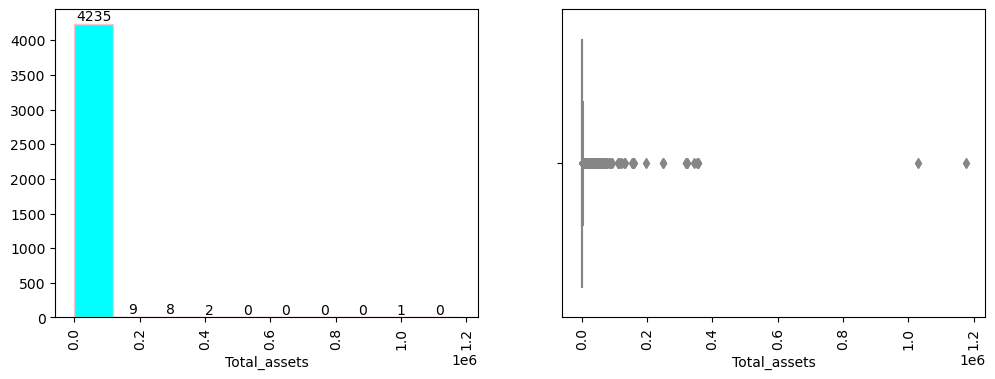

Skewness of Net_worth:  31.85168555023475
Distribution of Net_worth
----------------------------------------------------------------------------


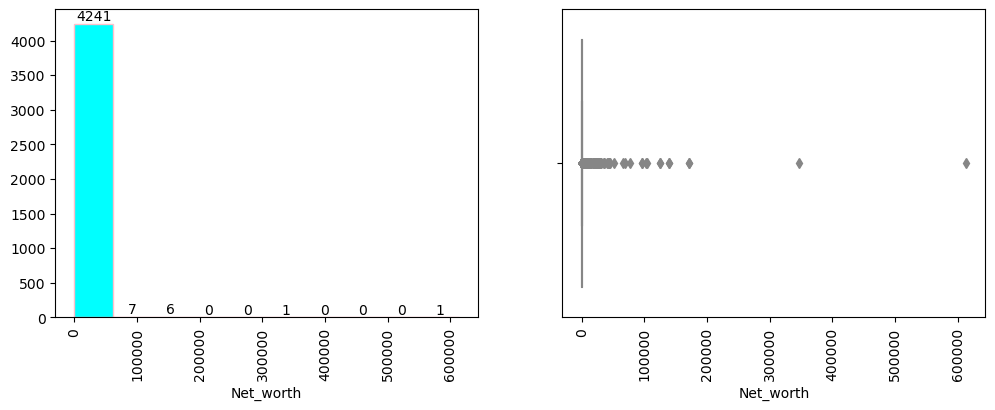

Skewness of Total_income:  31.443117127058954
Distribution of Total_income
----------------------------------------------------------------------------


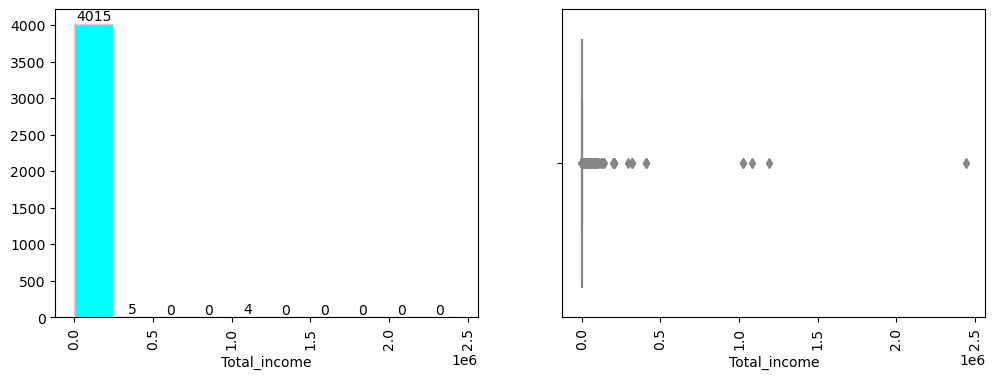

Skewness of Change_in_stock:  18.02425906208548
Distribution of Change_in_stock
----------------------------------------------------------------------------


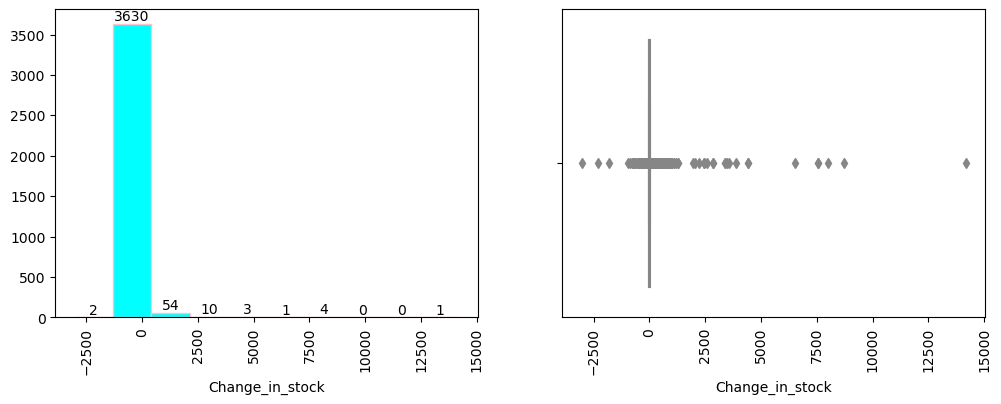

Skewness of Total_expenses:  32.19039096721928
Distribution of Total_expenses
----------------------------------------------------------------------------


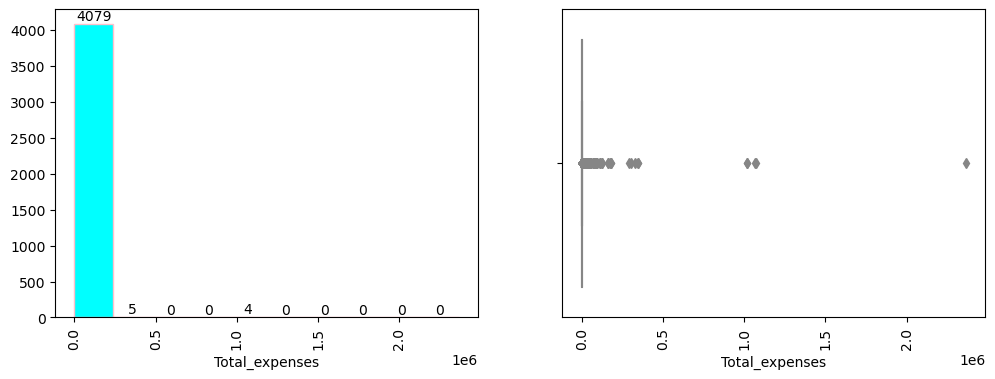

Skewness of Profit_after_tax:  24.290605539925448
Distribution of Profit_after_tax
----------------------------------------------------------------------------


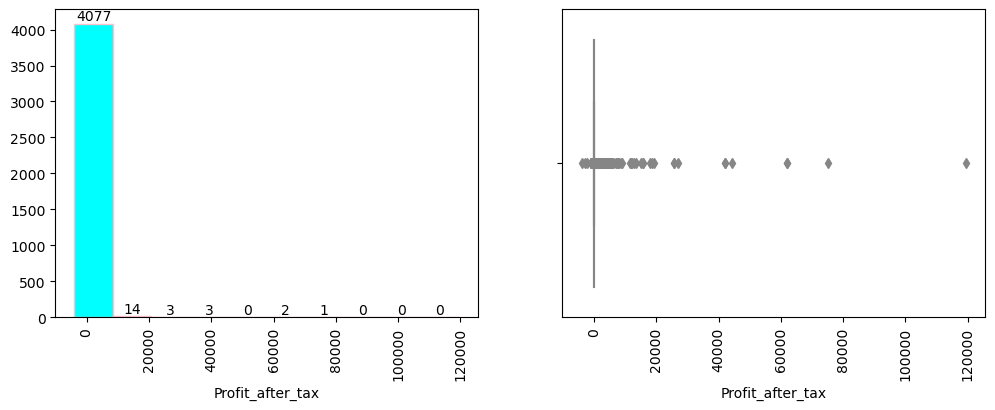

Skewness of PBDITA:  24.124350397794316
Distribution of PBDITA
----------------------------------------------------------------------------


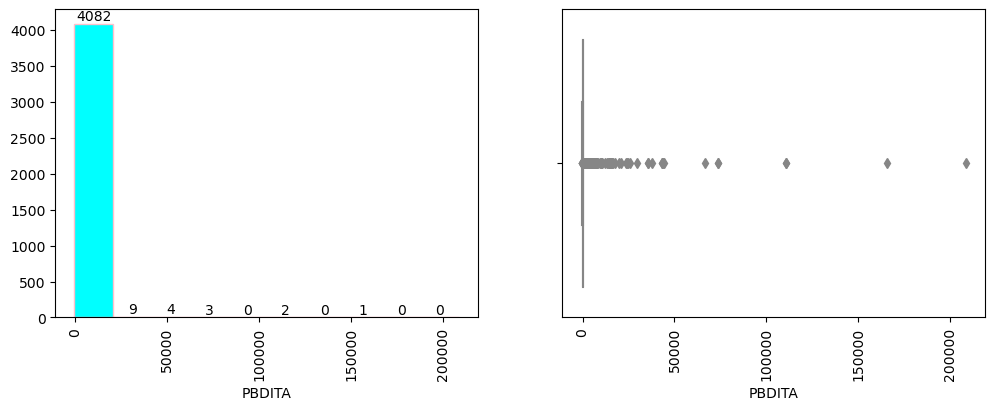

Skewness of PBT:  22.27588296254738
Distribution of PBT
----------------------------------------------------------------------------


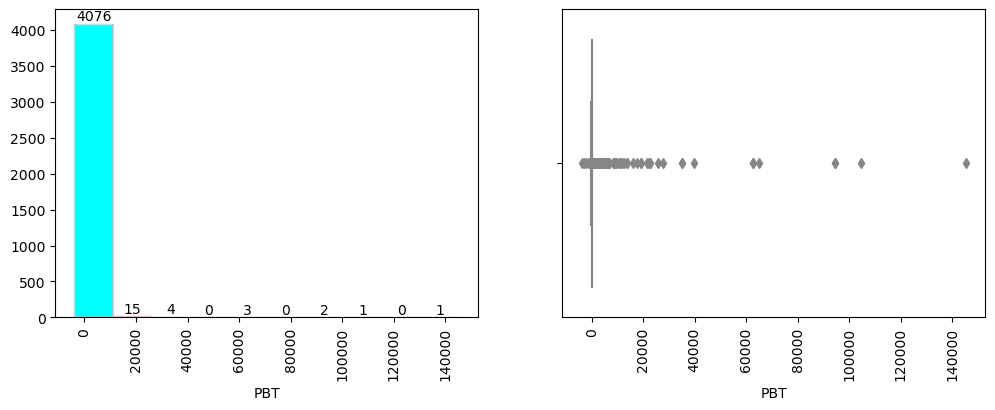

Skewness of Cash_profit:  27.667906279757602
Distribution of Cash_profit
----------------------------------------------------------------------------


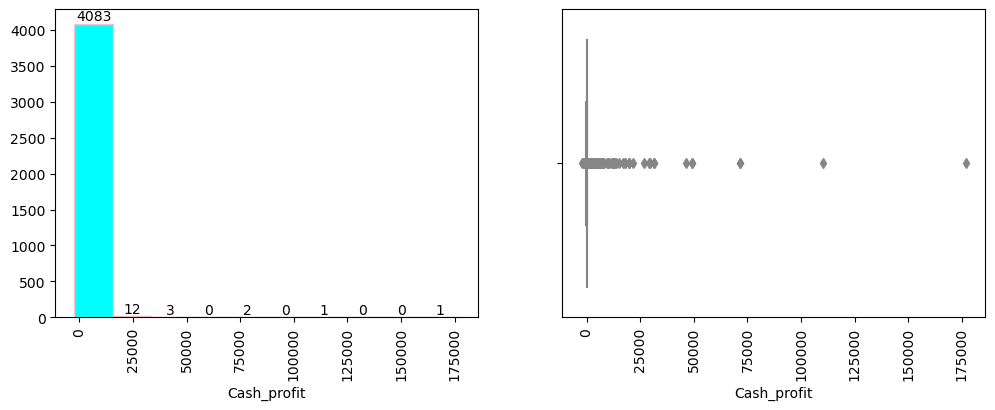

Skewness of PBDITA_as_perc_of_total_income:  -29.030768915099028
Distribution of PBDITA_as_perc_of_total_income
----------------------------------------------------------------------------


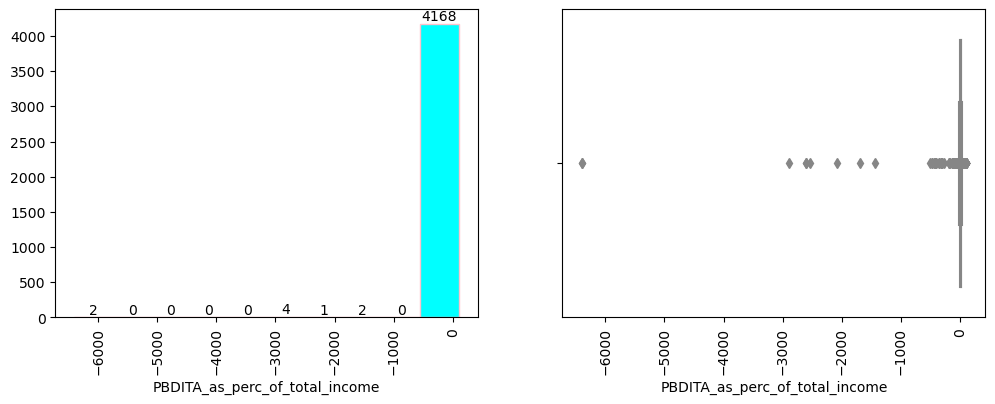

Skewness of PBT_as_perc_of_total_income:  -37.93698143766266
Distribution of PBT_as_perc_of_total_income
----------------------------------------------------------------------------


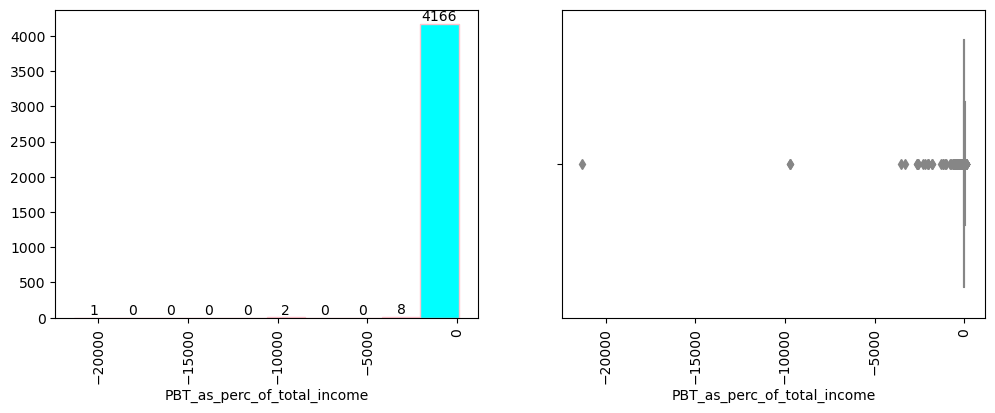

Skewness of PAT_as_perc_of_total_income:  -37.170127782409594
Distribution of PAT_as_perc_of_total_income
----------------------------------------------------------------------------


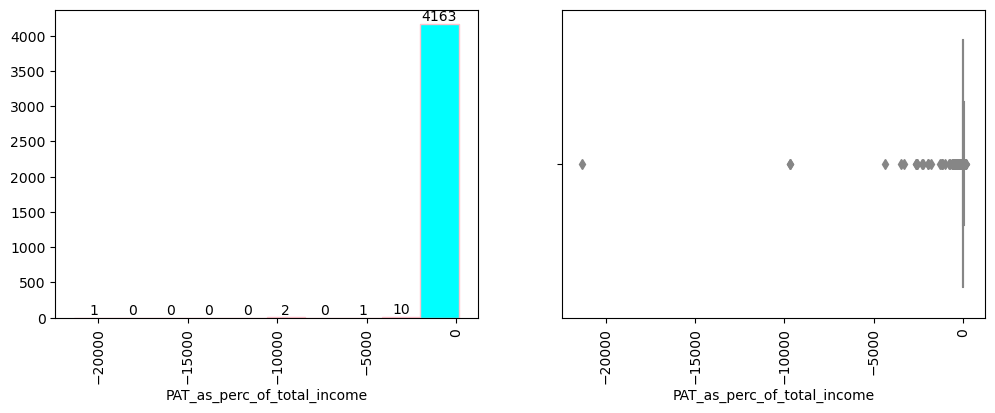

Skewness of Cash_profit_as_perc_of_total_income:  -36.017774923113926
Distribution of Cash_profit_as_perc_of_total_income
----------------------------------------------------------------------------


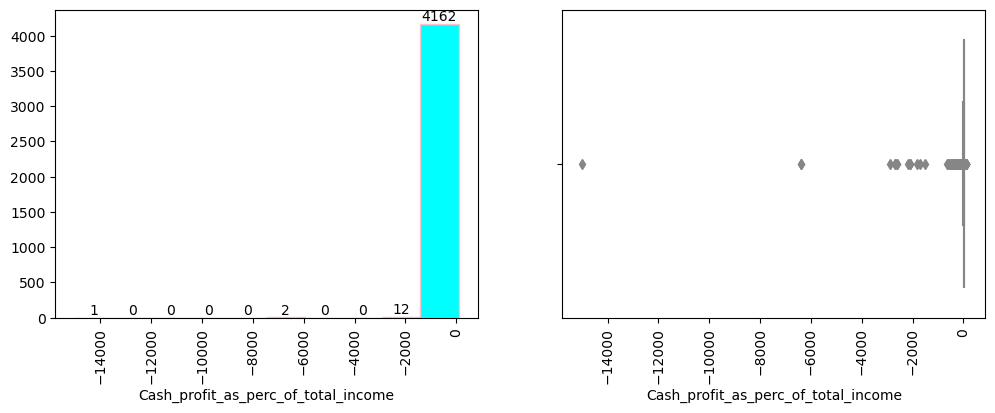

Skewness of PAT_as_perc_of_net_worth:  17.76197818185262
Distribution of PAT_as_perc_of_net_worth
----------------------------------------------------------------------------


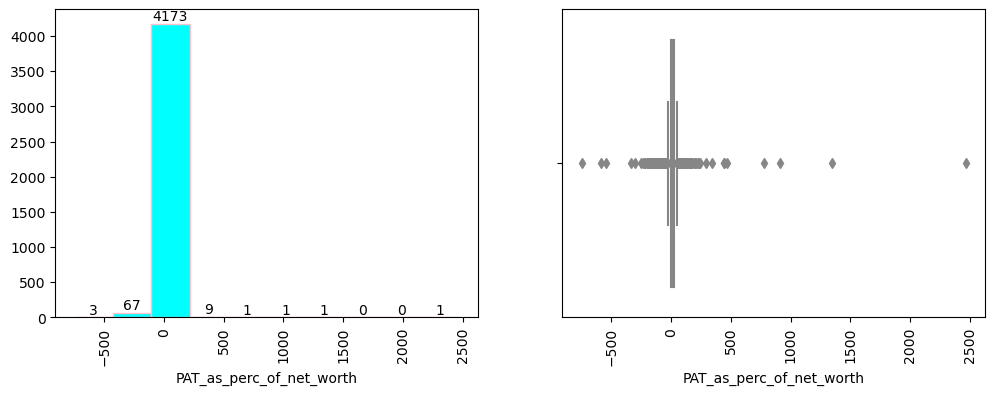

Skewness of Sales:  31.233586758881085
Distribution of Sales
----------------------------------------------------------------------------


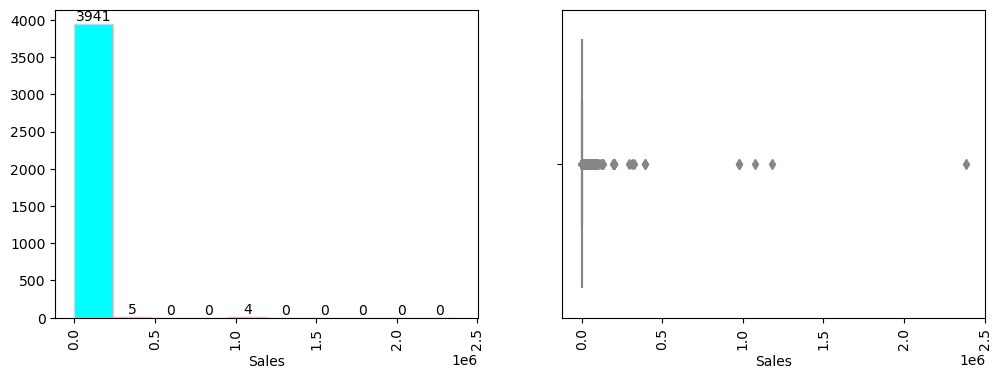

Skewness of Income_from_fincial_services:  40.46214235747733
Distribution of Income_from_fincial_services
----------------------------------------------------------------------------


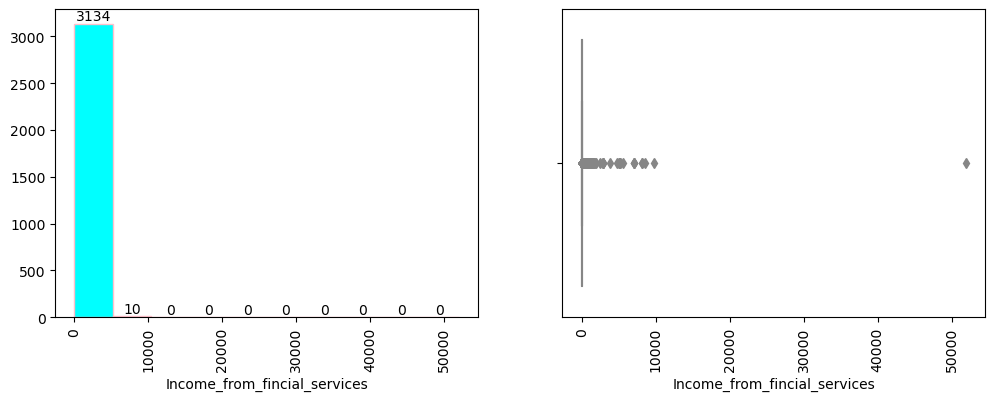

Skewness of Other_income:  35.59157972695797
Distribution of Other_income
----------------------------------------------------------------------------


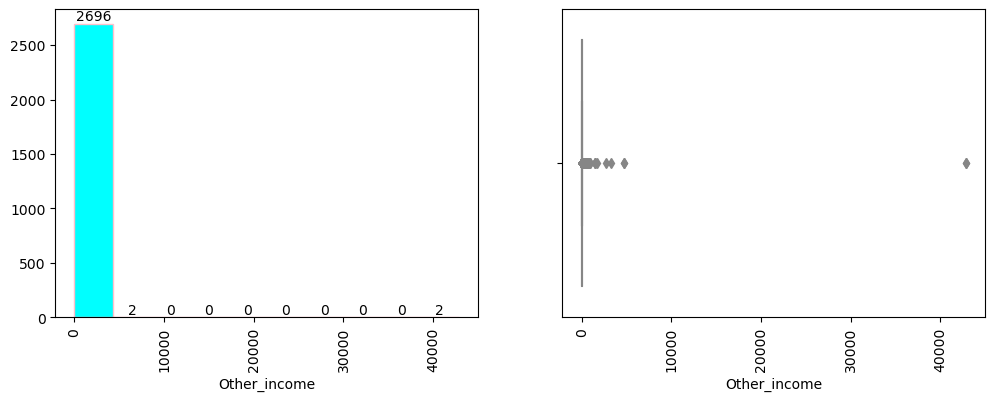

Skewness of Total_capital:  31.49232680482334
Distribution of Total_capital
----------------------------------------------------------------------------


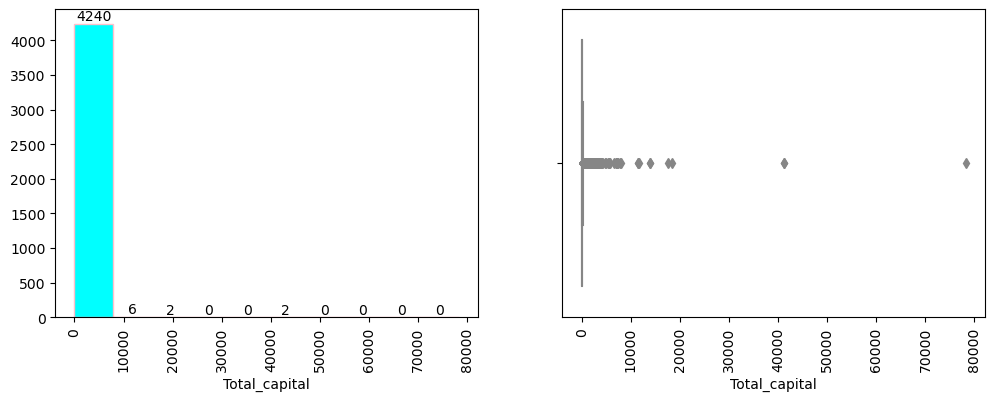

Skewness of Reserves_and_funds:  34.10896619433152
Distribution of Reserves_and_funds
----------------------------------------------------------------------------


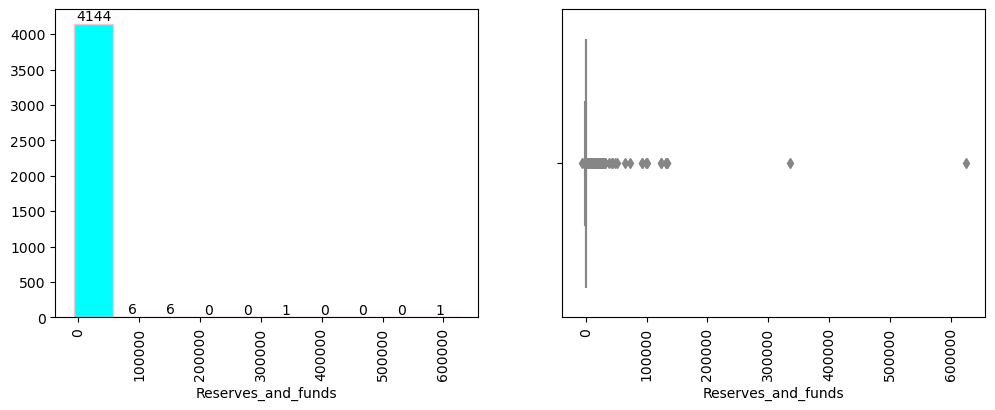

Skewness of Borrowings:  20.89130094122057
Distribution of Borrowings
----------------------------------------------------------------------------


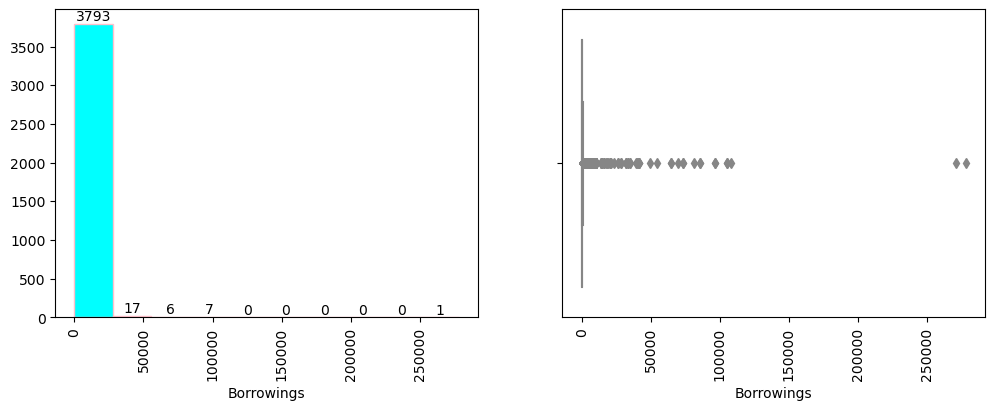

Skewness of Current_liabilities_&_provisions:  26.506919789566954
Distribution of Current_liabilities_&_provisions
----------------------------------------------------------------------------


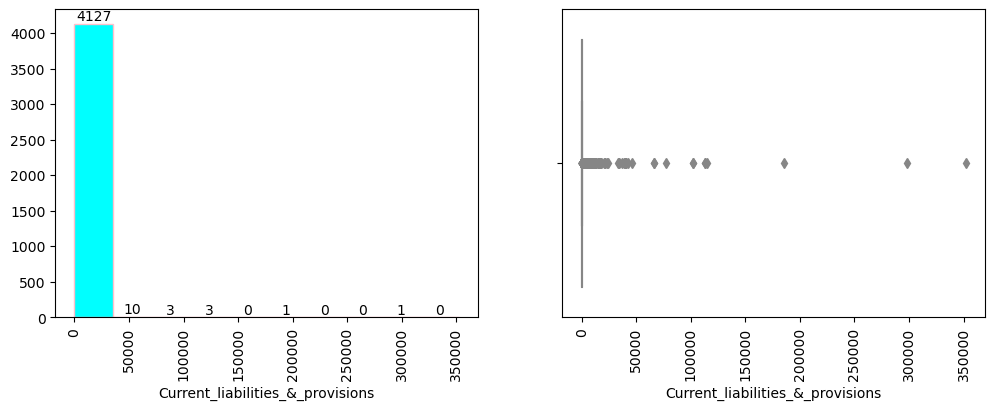

Skewness of Deferred_tax_liability:  23.73930173510226
Distribution of Deferred_tax_liability
----------------------------------------------------------------------------


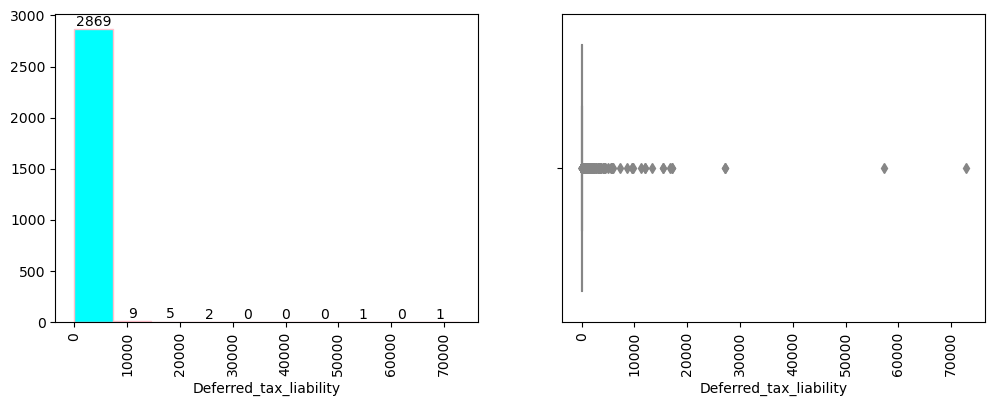

Skewness of Shareholders_funds:  31.549033473390544
Distribution of Shareholders_funds
----------------------------------------------------------------------------


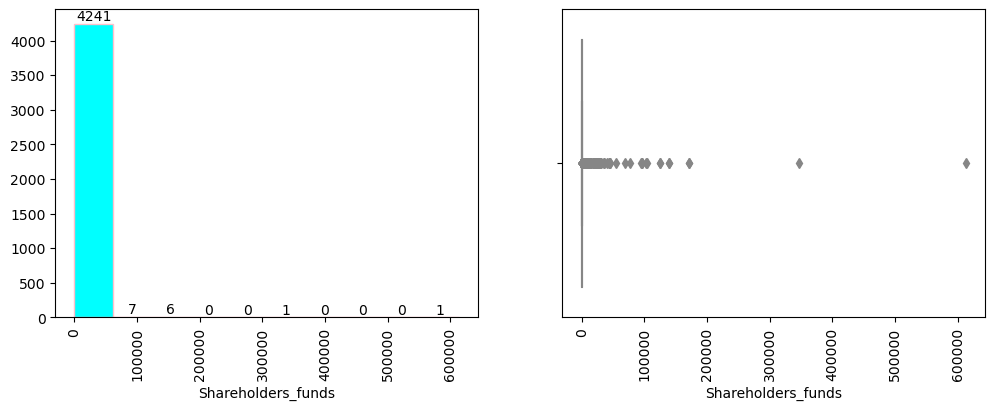

Skewness of Cumulative_retained_profits:  27.82460089549344
Distribution of Cumulative_retained_profits
----------------------------------------------------------------------------


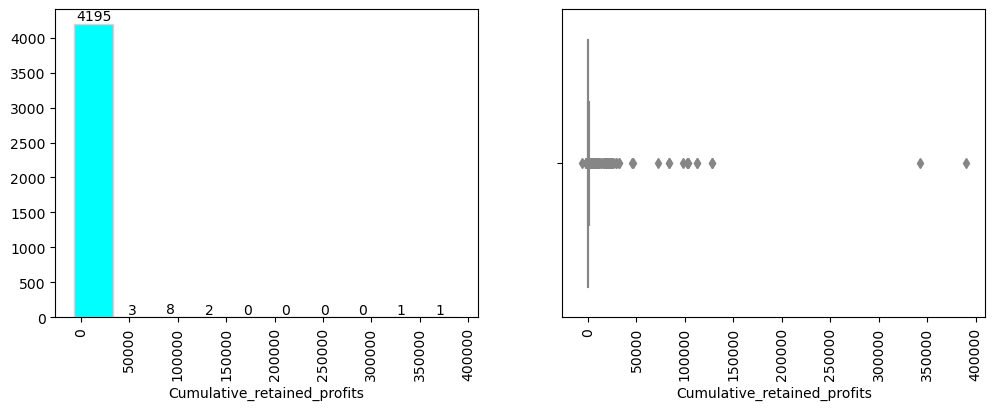

Skewness of Capital_employed:  28.275798714262976
Distribution of Capital_employed
----------------------------------------------------------------------------


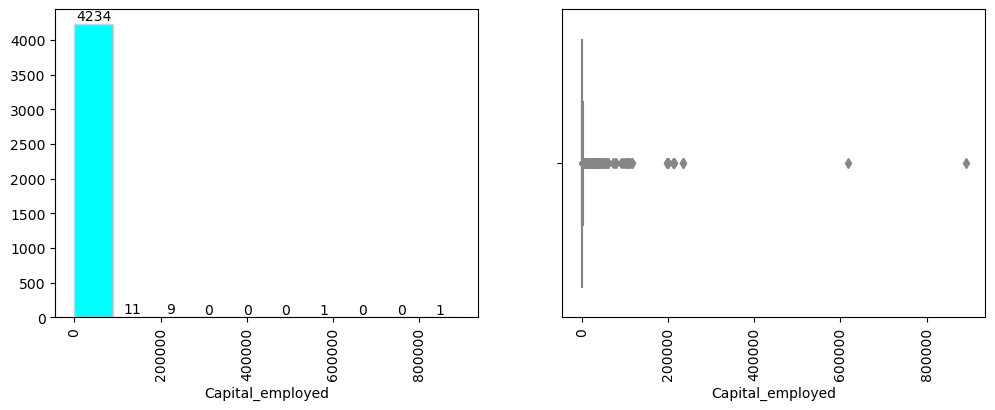

Skewness of TOL_to_TNW:  8.893421434492717
Distribution of TOL_to_TNW
----------------------------------------------------------------------------


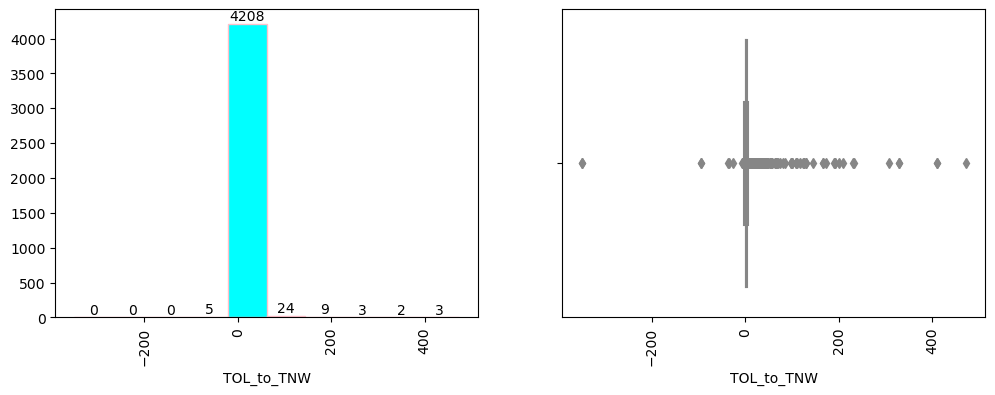

Skewness of Total_term_liabilities__to__tangible_net_worth:  9.033640135164498
Distribution of Total_term_liabilities__to__tangible_net_worth
----------------------------------------------------------------------------


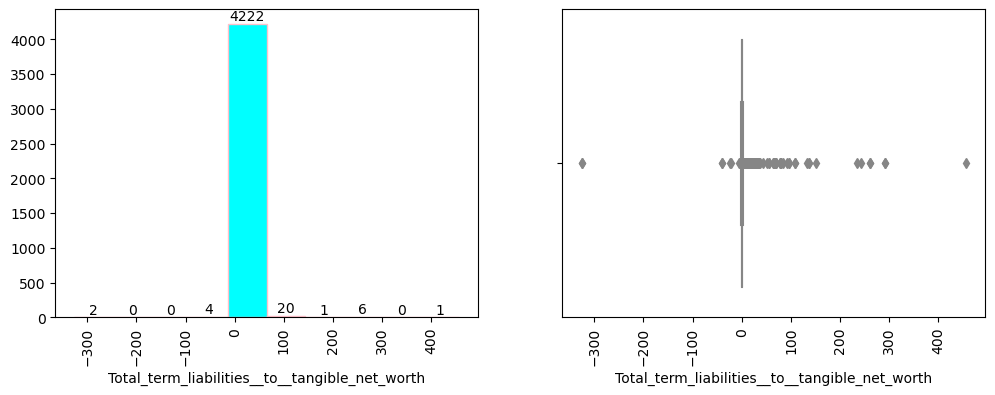

Skewness of Contingent_liabilities__to__Net_worth_perc:  24.542579962375754
Distribution of Contingent_liabilities__to__Net_worth_perc
----------------------------------------------------------------------------


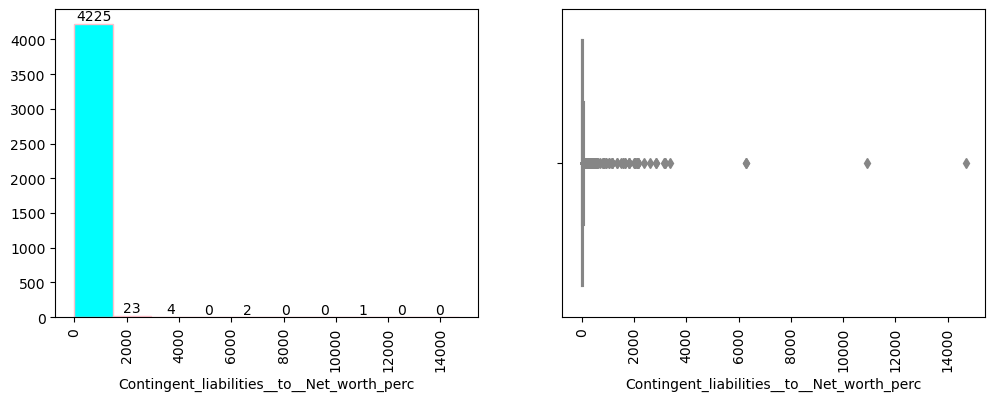

Skewness of Contingent_liabilities:  37.76261464043822
Distribution of Contingent_liabilities
----------------------------------------------------------------------------


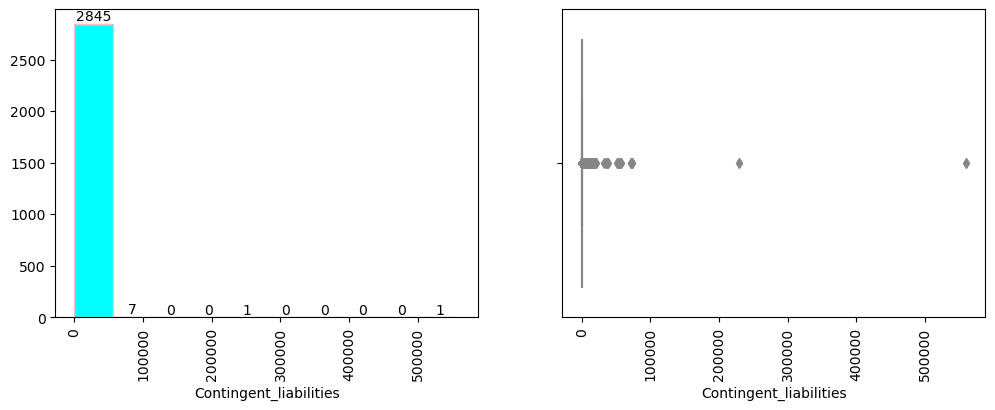

Skewness of Net_fixed_assets:  37.623726678314426
Distribution of Net_fixed_assets
----------------------------------------------------------------------------


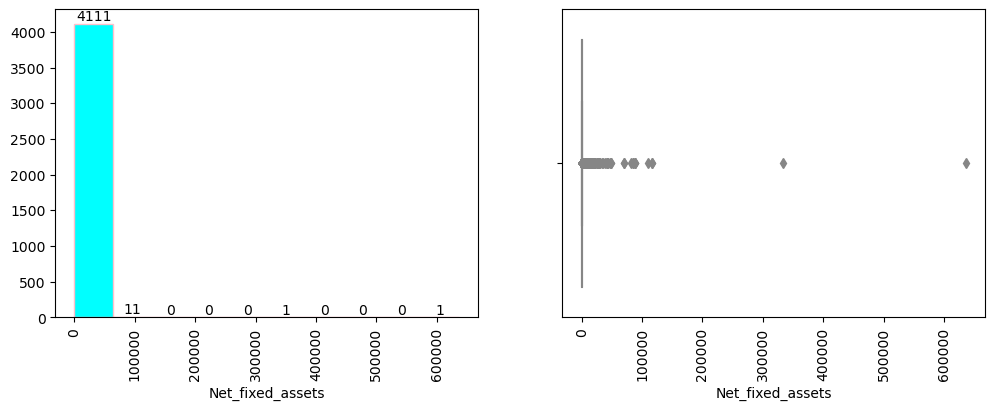

Skewness of Investments:  19.44284742648704
Distribution of Investments
----------------------------------------------------------------------------


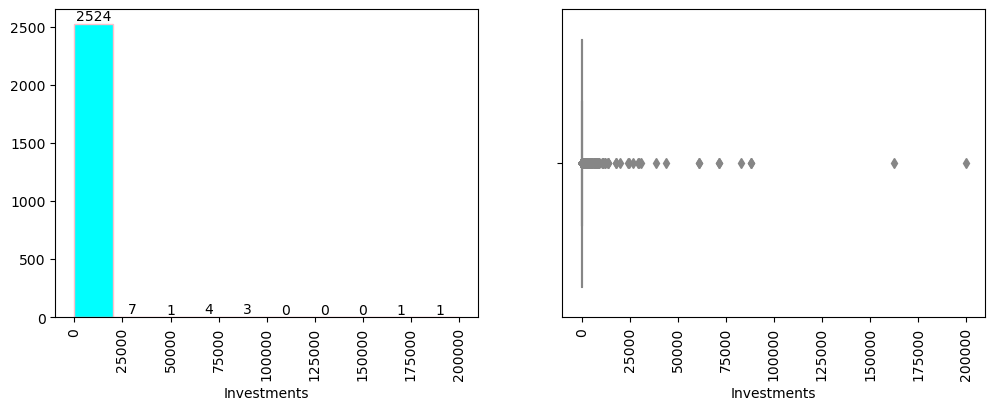

Skewness of Current_assets:  21.325078906073383
Distribution of Current_assets
----------------------------------------------------------------------------


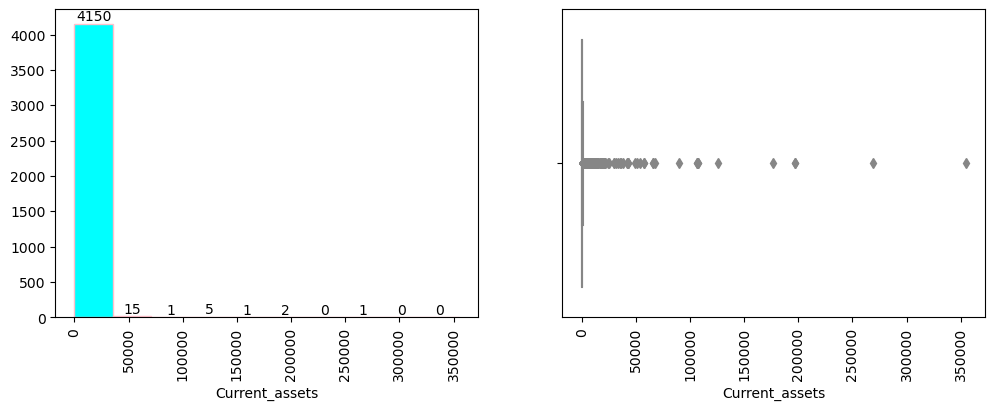

Skewness of Net_working_capital:  8.83680862778684
Distribution of Net_working_capital
----------------------------------------------------------------------------


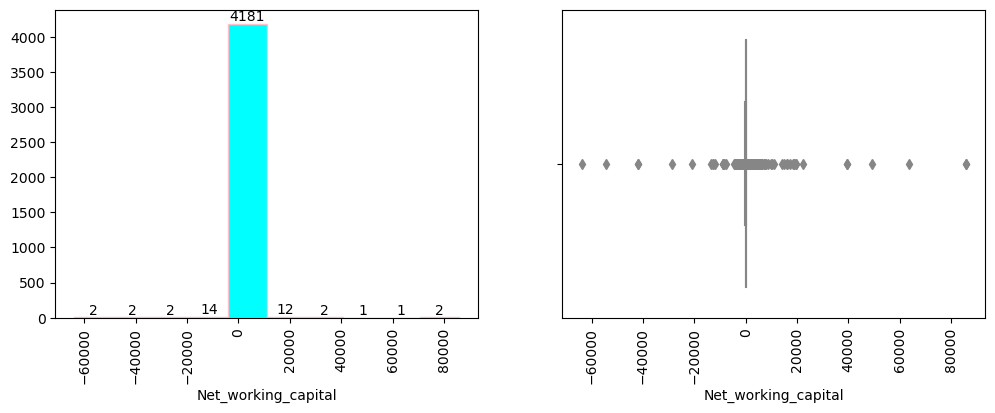

Skewness of Quick_ratio_times:  27.43150509863591
Distribution of Quick_ratio_times
----------------------------------------------------------------------------


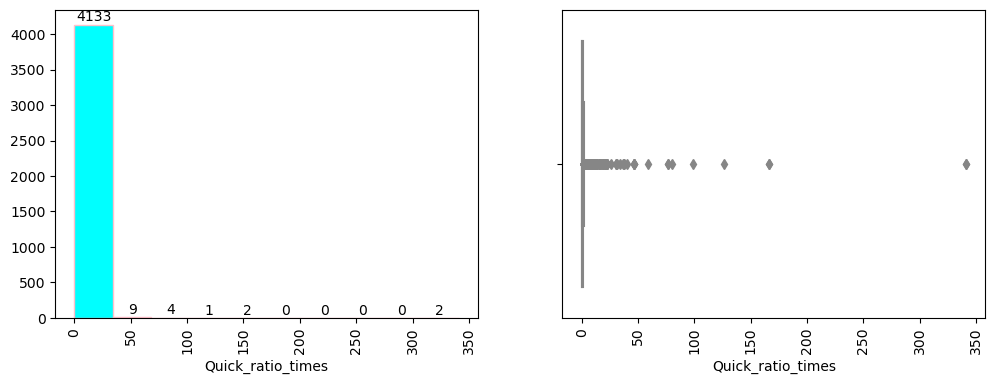

Skewness of Current_ratio_times:  33.284367631977865
Distribution of Current_ratio_times
----------------------------------------------------------------------------


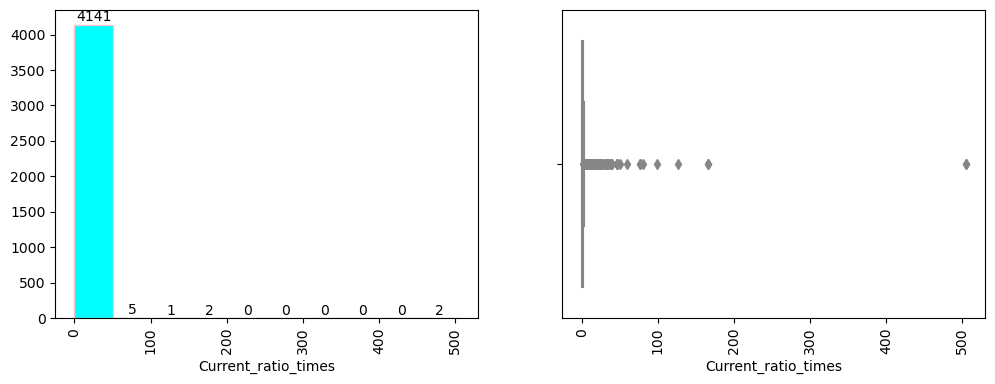

Skewness of Debt_to_equity_ratio_times:  16.33081181955665
Distribution of Debt_to_equity_ratio_times
----------------------------------------------------------------------------


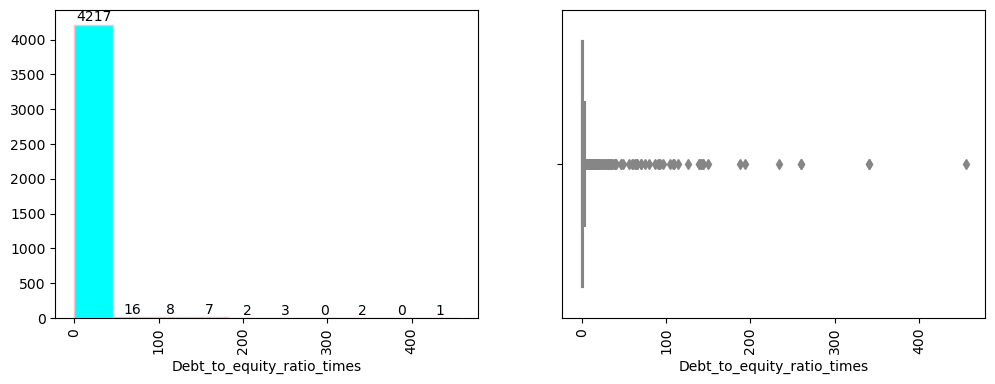

Skewness of Cash_to_current_liabilities_times:  26.45695782397687
Distribution of Cash_to_current_liabilities_times
----------------------------------------------------------------------------


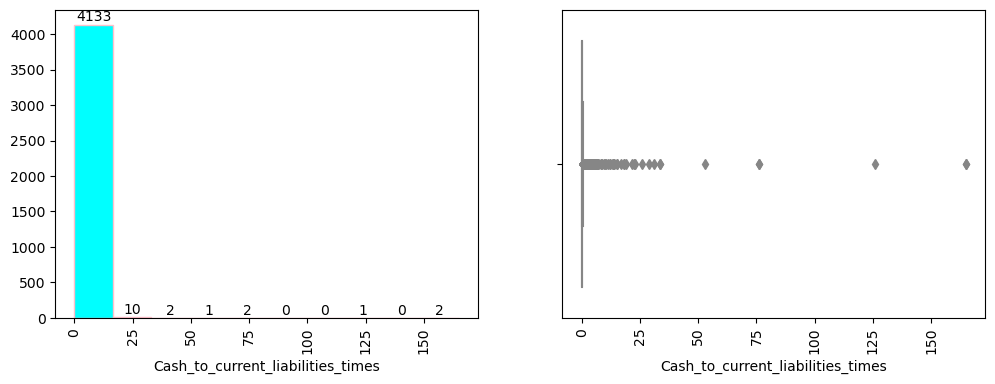

Skewness of Cash_to_average_cost_of_sales_per_day:  38.84093937509801
Distribution of Cash_to_average_cost_of_sales_per_day
----------------------------------------------------------------------------


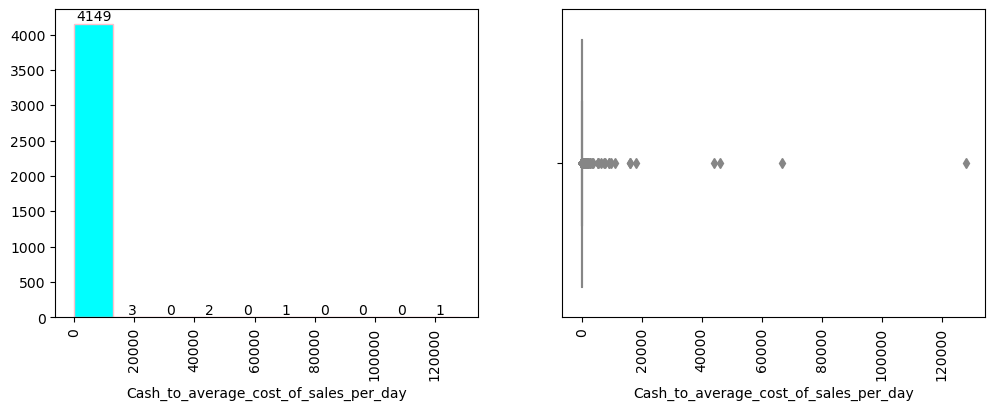

Skewness of Creditors_turnover:  19.719290987425236
Distribution of Creditors_turnover
----------------------------------------------------------------------------


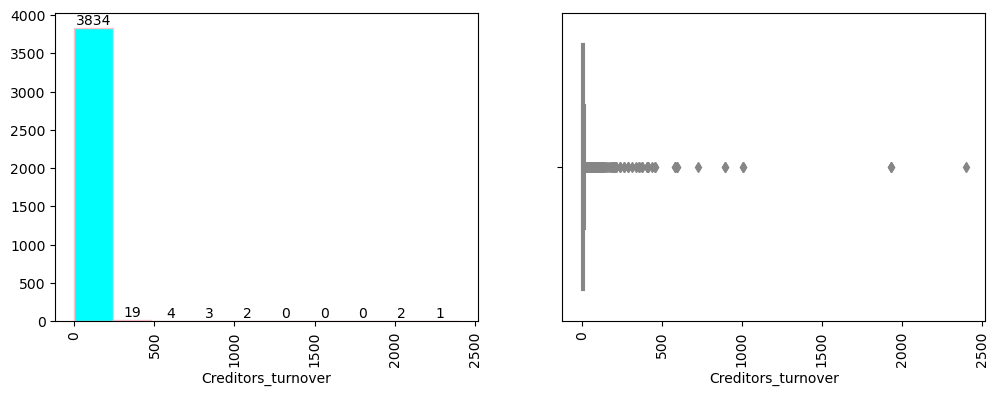

Skewness of Debtors_turnover:  22.907661706656093
Distribution of Debtors_turnover
----------------------------------------------------------------------------


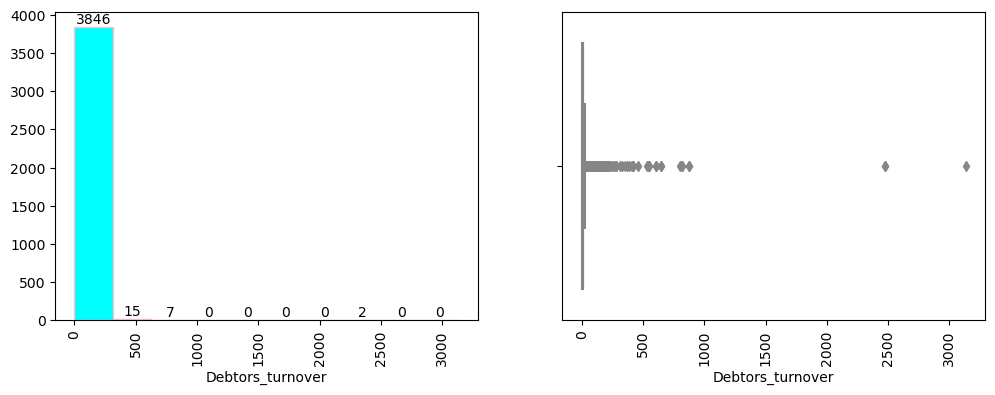

Skewness of Finished_goods_turnover:  20.84466000026286
Distribution of Finished_goods_turnover
----------------------------------------------------------------------------


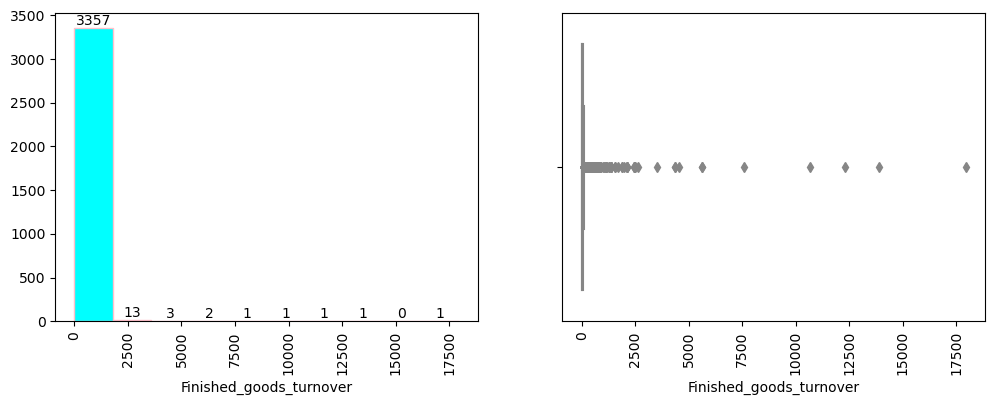

Skewness of WIP_turnover:  25.686670200282673
Distribution of WIP_turnover
----------------------------------------------------------------------------


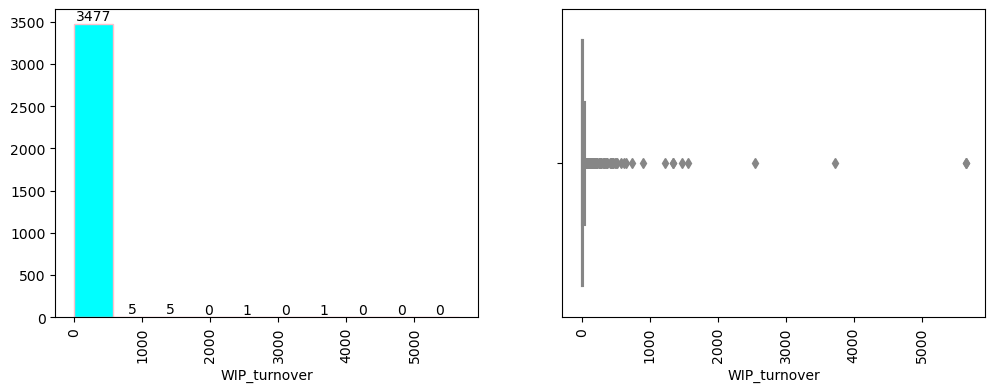

Skewness of Raw_material_turnover:  60.60776081295366
Distribution of Raw_material_turnover
----------------------------------------------------------------------------


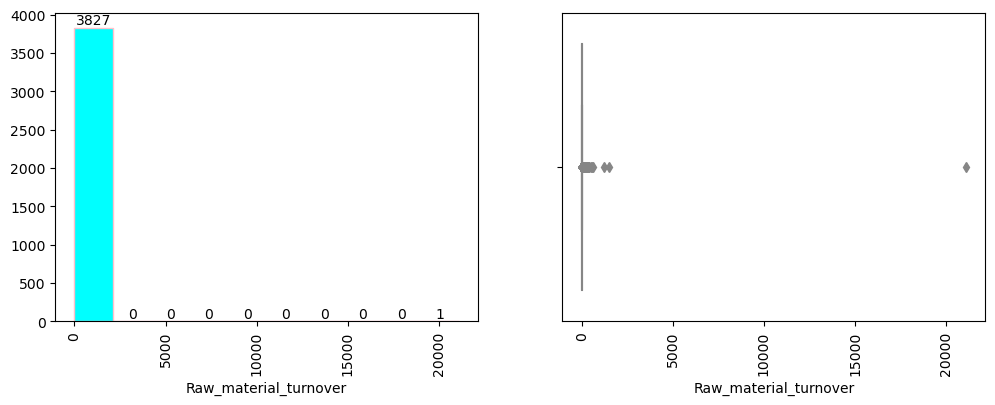

Skewness of Shares_outstanding:  11.034062150689422
Distribution of Shares_outstanding
----------------------------------------------------------------------------


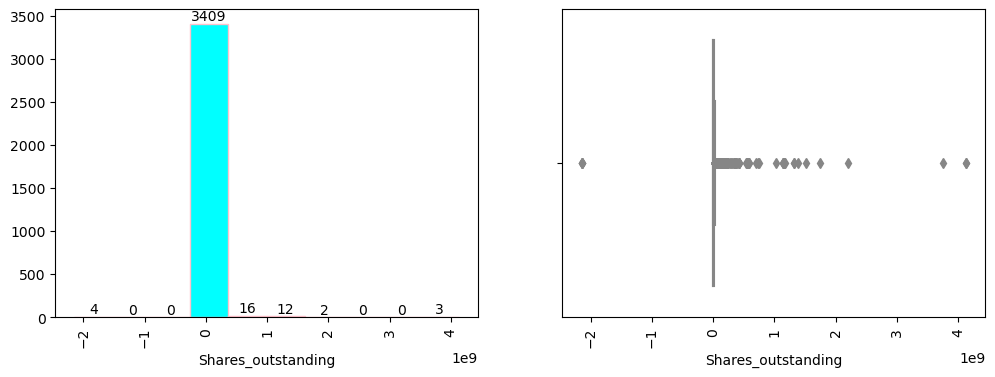

Skewness of EPS:  -63.28748213566746
Distribution of EPS
----------------------------------------------------------------------------


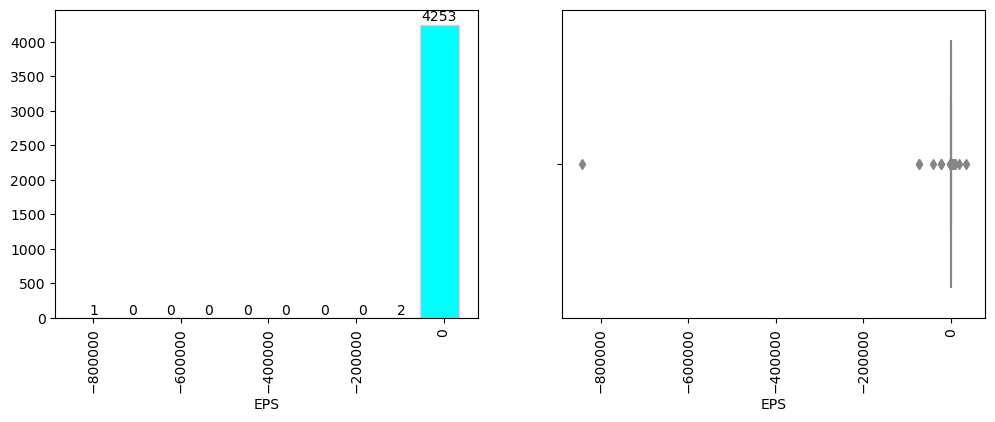

Skewness of Adjusted_EPS:  -63.28752879020988
Distribution of Adjusted_EPS
----------------------------------------------------------------------------


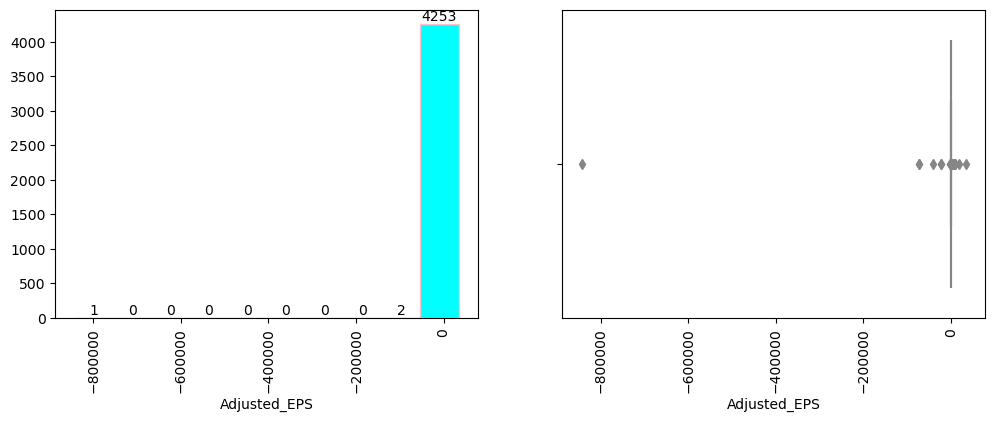

Skewness of Total_liabilities:  26.422680474857692
Distribution of Total_liabilities
----------------------------------------------------------------------------


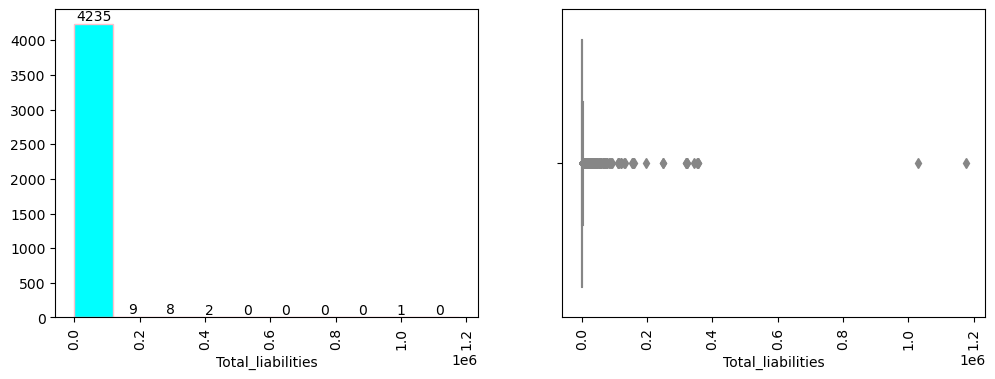

Skewness of PE_on_BSE:  37.1968344949466
Distribution of PE_on_BSE
----------------------------------------------------------------------------


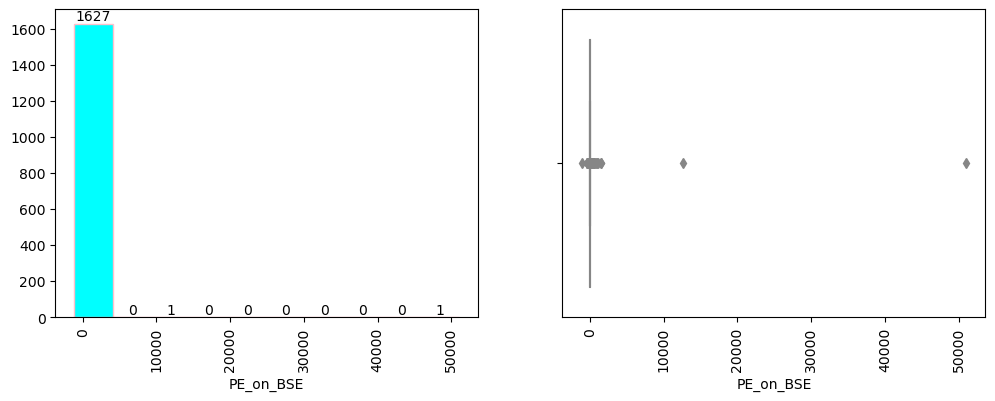

Skewness of default:  1.4067868482705692
Distribution of default
----------------------------------------------------------------------------


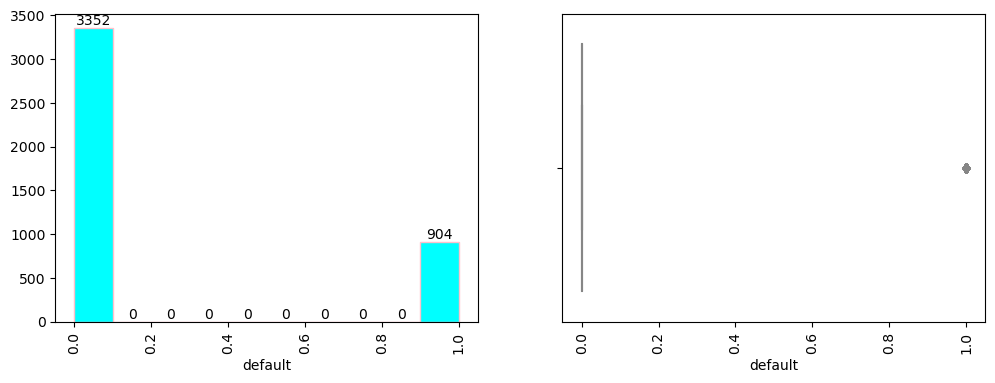

In [150]:
#defining a function for univariate analysis of numeric columns
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)
        
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

# calling the function for univariate analysis
for column in company_data_v1.columns:
    univariateAnalysis_numeric(company_data_v1, column)

### Bivariate Analysis

heatmap


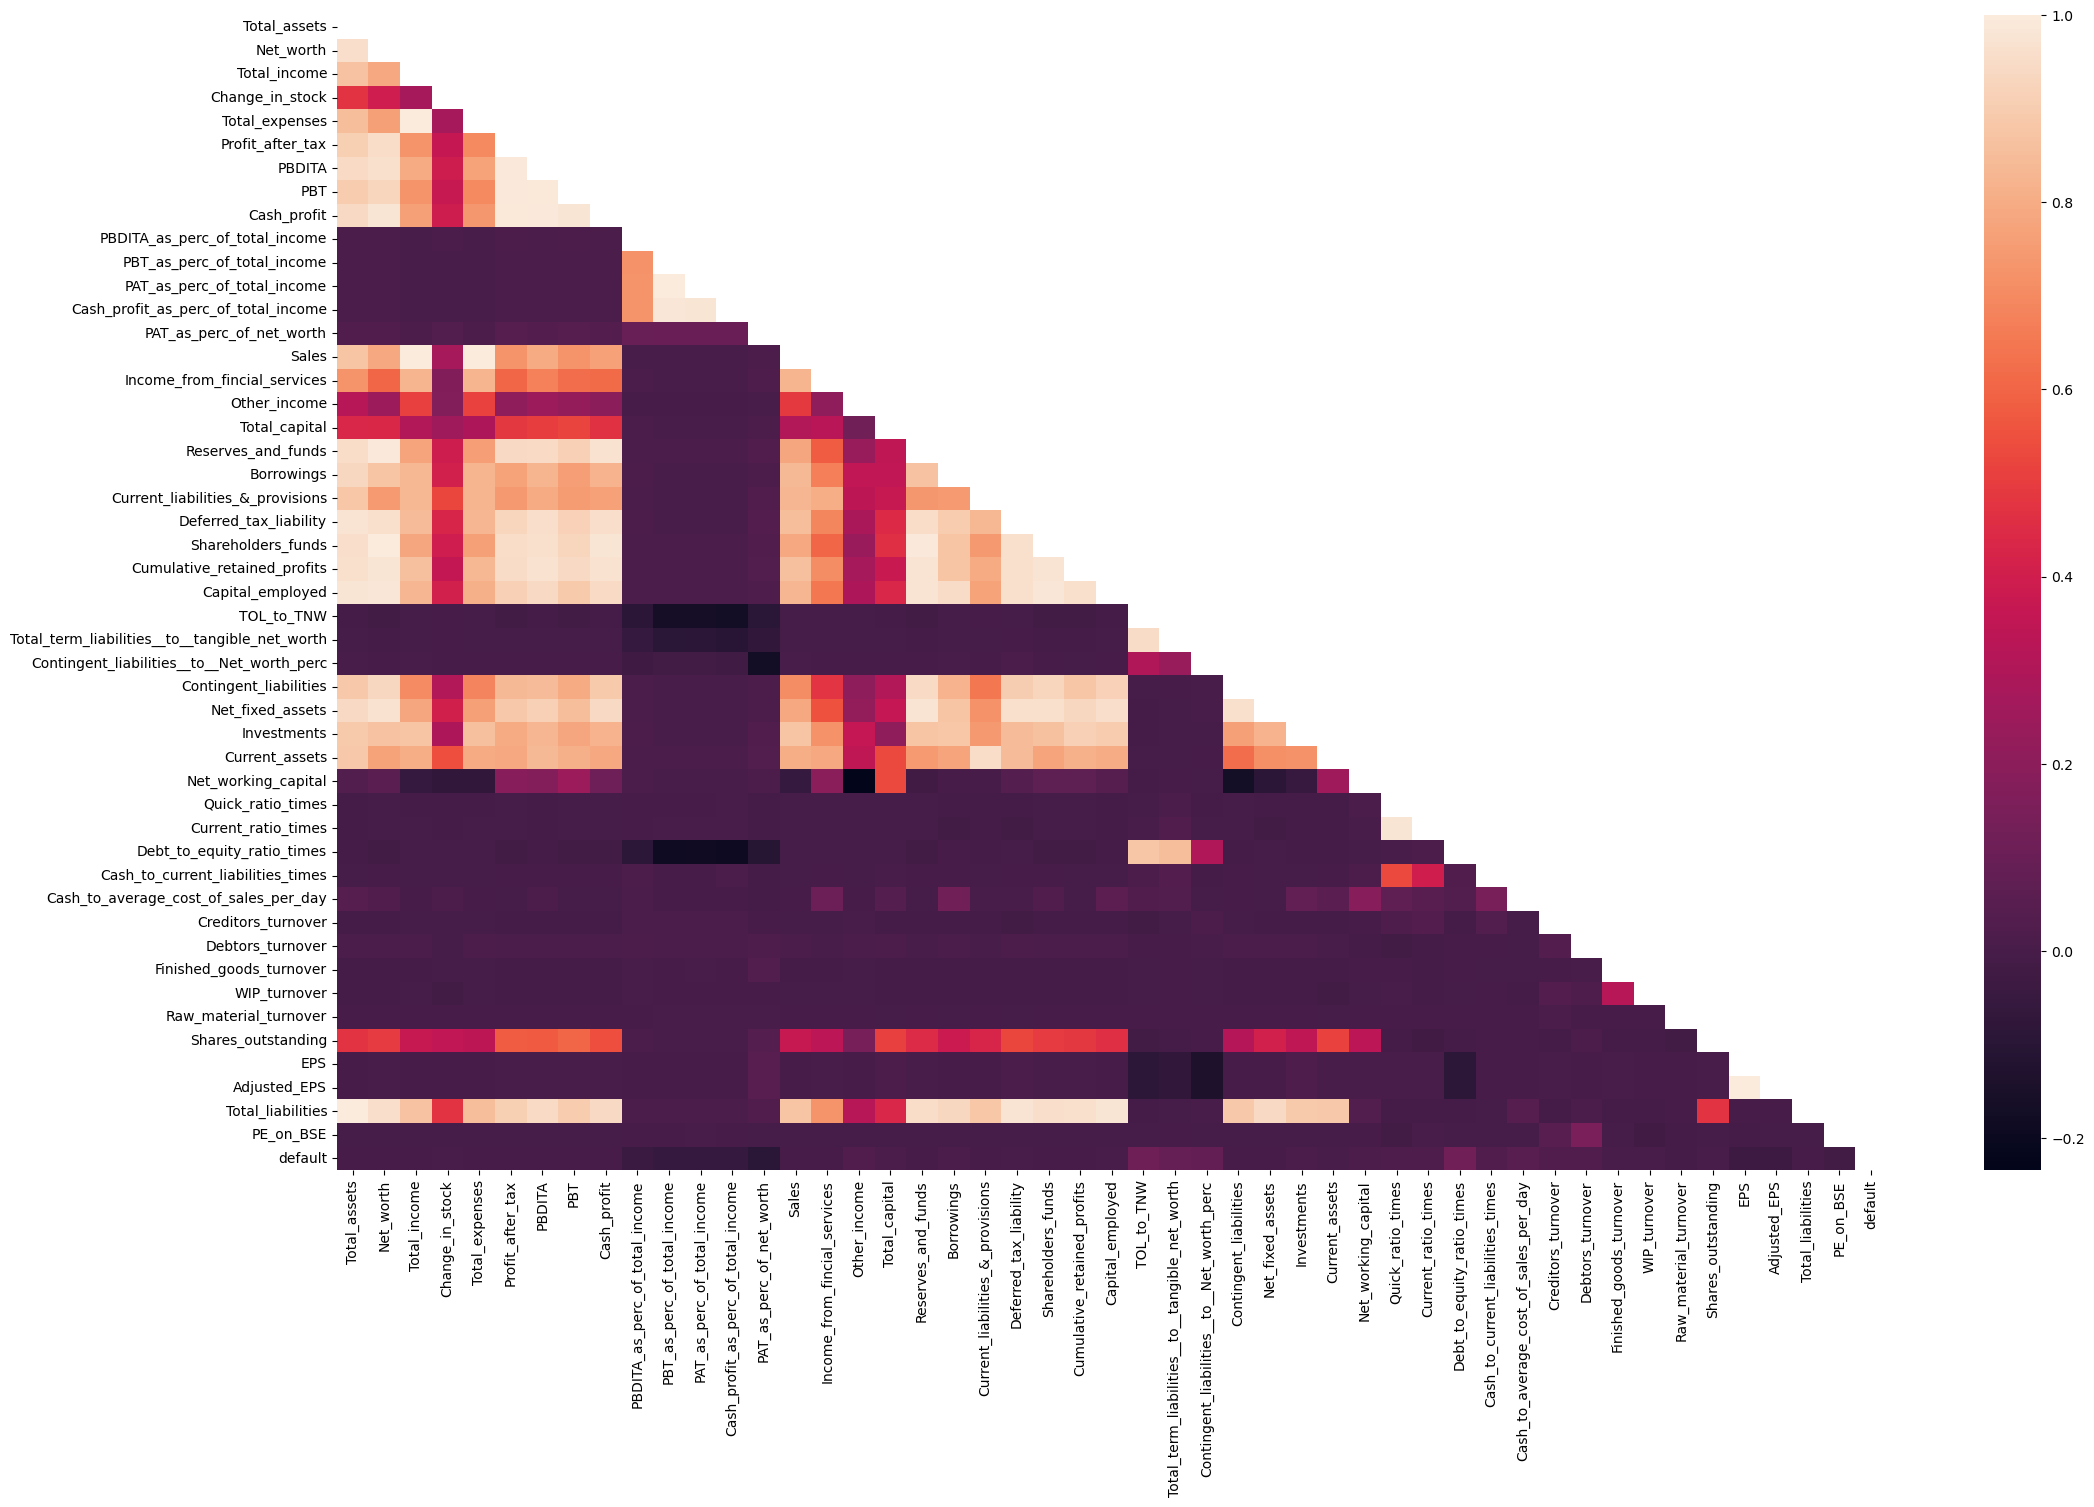

In [151]:
# heatmap
print('heatmap')
corr = company_data_v1.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(company_data_v1.corr(), mask=mask)
plt.show()

##### Key Observations
1. In the univariate analysis, plotting each attribute revealed that most of the data is concentrated within a narrow range, with a substantial number of extreme values falling outside this range making data heavily skewed.
2. The heatmap reveals a high correlation between multiple pairs of attributes, likely due to their interdependence or derivation from one another. To address this issue, we will employ the Variance Inflation Factor (VIF) from the statsmodels library to identify and drop attributes with high levels of multicollinearity.
3. The response variable does not show any significant correlation with any variable.

## Outlier Treatment

There are outliers in all the columns. Before moving ahead we will be segregating target variable from the original data

In [152]:
company_X = company_data_v1.drop(['default'], axis=1)
company_Y = company_data_v1['default']

In [153]:
company_X

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,827.60,336.50,534.10,13.50,508.70,38.90,124.40,64.60,95.20,23.29,...,11.60,5.65,3.99,3.37,14.87,8760056.00,4.44,4.44,827.60,NaN
1,67.70,24.30,137.90,-3.70,131.00,3.20,5.50,1.00,3.80,3.99,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.70,NaN
2,238.40,78.90,331.20,-18.10,309.20,3.90,25.80,10.50,9.40,7.79,...,2.24,2.51,17.67,8.76,8.35,NaN,0.00,0.00,238.40,NaN
3,6883.50,1443.30,8448.50,212.20,8482.40,178.30,418.40,185.10,178.00,4.95,...,3.48,1.91,18.14,18.62,11.11,10000000.00,17.60,17.60,6883.50,NaN
4,90.90,47.00,388.60,3.40,392.70,-0.70,7.20,-0.60,3.90,1.85,...,21.67,68.00,45.87,28.67,19.93,107315.00,-6.52,-6.52,90.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0.40,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.40,NaN
4252,159.60,86.70,172.90,0.10,169.70,3.30,18.40,3.70,12.60,10.64,...,4.86,1.80,11.00,8.28,9.88,8162700.00,0.42,0.42,159.60,16.81
4253,833.80,664.60,2314.70,32.10,2151.60,195.20,348.40,303.00,219.50,15.05,...,28.37,6.08,59.28,31.14,9.87,7479762.00,26.58,26.58,833.80,5.69
4254,95.00,48.50,110.50,4.60,113.50,1.60,9.70,2.60,6.70,8.78,...,6.12,3.71,78.99,11.51,14.95,NaN,0.00,0.00,95.00,NaN


Checking number of outliers by each column

In [154]:
Q1 = company_X.quantile(0.25)
Q3 = company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [155]:
((company_X > UL) | (company_X < LL)).sum()

Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_as_perc_of_total_income                    346
PBT_as_perc_of_total_income                       546
PAT_as_perc_of_total_income                       610
Cash_profit_as_perc_of_total_income               426
PAT_as_perc_of_net_worth                          427
Sales                                             500
Income_from_fincial_services                      517
Other_income                                      389
Total_capital                                     551
Reserves_and_funds          

In [156]:
((company_X > UL) | (company_X < LL)).sum().sum()

24789

In [157]:
print('Outliers as a proportion of total data')
print(round(((company_X > UL) | (company_X < LL)).sum().sum()*100/company_X.size,2),'%')

Outliers as a proportion of total data
12.13 %


If we take the standard approach where we consider outliers to above 1.5 times the IQR over Q3 value or 1.5 times the IQR below Q1 value then we will have over 12% of the data as outlier adding to this the missing values which account over 8% of the data, we will have over 20% of the data as made up data. 
Rather than using IQR and Q1, Q3 we will use 5 and 95 percentile as cutoff and check number of outliers based on this.

In [158]:
LL = company_X.quantile(0.05)
UL = company_X.quantile(0.95)

In [159]:
print('missing values based 5 and 95 percentile as cutoff')
((company_X > UL) | (company_X < LL)).sum()

missing values based 5 and 95 percentile as cutoff


Total_assets                                      424
Net_worth                                         421
Total_income                                      404
Change_in_stock                                   371
Total_expenses                                    410
Profit_after_tax                                  412
PBDITA                                            407
PBT                                               412
Cash_profit                                       411
PBDITA_as_perc_of_total_income                    418
PBT_as_perc_of_total_income                       418
PAT_as_perc_of_total_income                       418
Cash_profit_as_perc_of_total_income               416
PAT_as_perc_of_net_worth                          426
Sales                                             396
Income_from_fincial_services                      159
Other_income                                      138
Total_capital                                     420
Reserves_and_funds          

In [160]:
print('Outliers as a proportion of total data')
print(round(((company_X > UL) | (company_X < LL)).sum().sum()*100/company_X.size,2),'%')

Outliers as a proportion of total data
8.24 %


On taking upper limit at 95 percentile and lower limit at 5 percentile we have bought the proportion of outliers to 8% from 12% thus we will be considering these value as upper limit and lower limit. Rather than assigning the upper limit and lower limit values to the outliers we will change them to null values and then treat them like missing values using KNN imputer on them also.

In [161]:
# converting outliers to missing values
company_X[((company_X > UL) | (company_X < LL))]= np.nan

In [162]:
print('Column vice null data')
company_X.isnull().sum()

Column vice null data


Total_assets                                       424
Net_worth                                          421
Total_income                                       635
Change_in_stock                                    921
Total_expenses                                     575
Profit_after_tax                                   566
PBDITA                                             561
PBT                                                566
Cash_profit                                        565
PBDITA_as_perc_of_total_income                     497
PBT_as_perc_of_total_income                        497
PAT_as_perc_of_total_income                        497
Cash_profit_as_perc_of_total_income                495
PAT_as_perc_of_net_worth                           426
Sales                                              701
Income_from_fincial_services                      1270
Other_income                                      1694
Total_capital                                      425
Reserves_a

In [163]:
print('Total number of null values:', company_X.isnull().sum().sum())

Total number of null values: 33807


In [164]:
print('Null values as a proportion of total data', round(company_X.isnull().sum().sum()*100/company_X.size,2),'%')

Null values as a proportion of total data 16.55 %


## Treating Missing values

In [165]:
# concatinating data for missing values
company_concat = pd.concat([company_X, company_Y], axis =1 )
company_concat.shape

(4256, 49)

#### Checking for missing values by columns

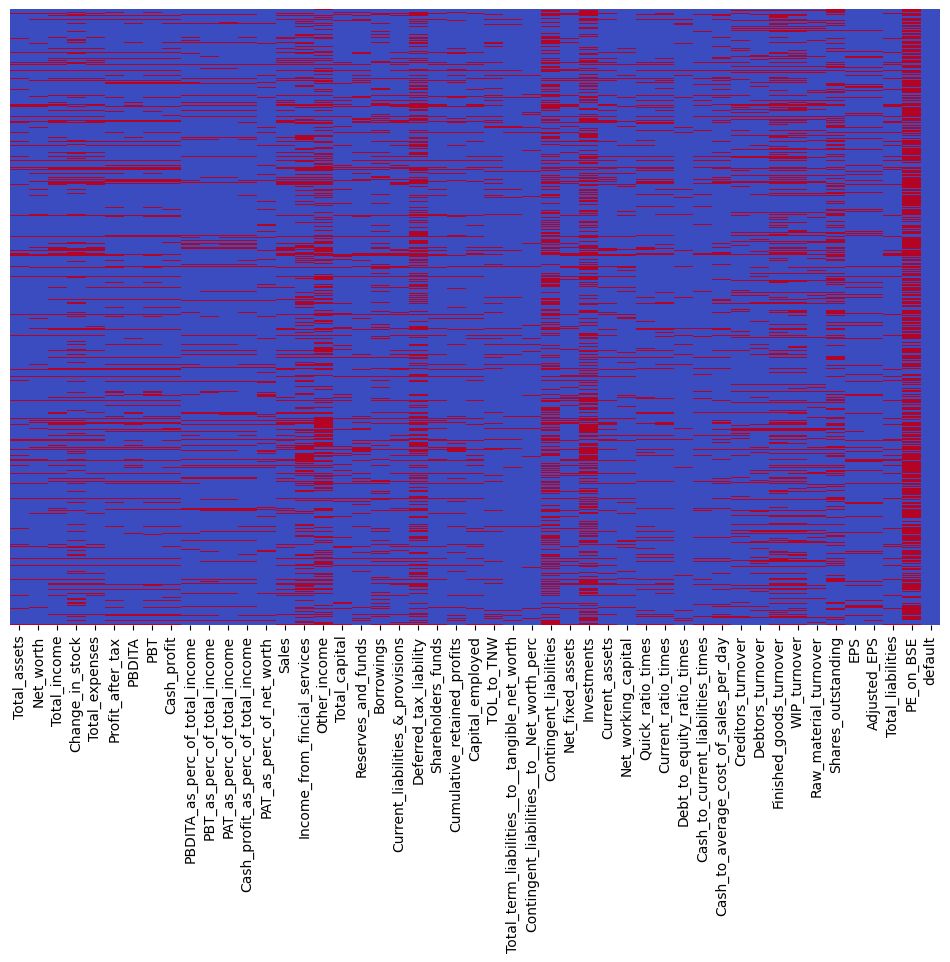

In [166]:
# visually checking for missing values
plt.figure(figsize = (12,8))
sns.heatmap(company_concat.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### Checking for missing values by row

In [167]:
company_concat.isnull().sum(axis = 1)

0        3
1        8
2        3
3        8
4        6
        ..
4251    32
4252     4
4253     2
4254     5
4255     2
Length: 4256, dtype: int64

On cheking for missing values by rows we can see that for some rows over 60% of the data is not present which is not an ideal condition as we have to make up over 60% information for these rows.
##### filter the data which is 90% or more complete at the row level

In [168]:
company_concat_temp = company_concat[company_concat.isnull().sum(axis = 1) <= 5]

In [169]:
print('data which is 90% or more complete at the row level')
company_concat_temp.shape

data which is 90% or more complete at the row level


(2285, 49)

Approximately half of the rows in the dataset have more than 10% missing values. To address this, we can filter out these rows and build the model using the remaining data. Additionally, it is crucial to determine whether the missing information is genuine or if it indicates an attempt by companies to conceal data. To investigate this, we will analyze the proportion of defaulters in the filtered dataset, which includes companies with over 90% of their data available.

In [170]:
# defaults for filtered data
print('defaults for filtered data')
company_concat_temp['default'].value_counts(normalize = True)

defaults for filtered data


default
0   0.83
1   0.17
Name: proportion, dtype: float64

In [171]:
# default for original data
print('default for original data')
company_data_v1['default'].value_counts(normalize=True)

default for original data


default
0   0.79
1   0.21
Name: proportion, dtype: float64

Companies with over 90% of their data available have a default rate of 17%, compared to 21% for the entire dataset. This indicates that companies with more than 10% of their data missing tend to have a higher likelihood of defaulting. This observation highlights the potential relationship between missing data and financial instability, warranting further investigation.
#### Checking for missing values by columns

In [172]:
company_concat.isnull().sum().sort_values(ascending = False)/company_concat.index.size

PE_on_BSE                                        0.66
Investments                                      0.44
Other_income                                     0.40
Contingent_liabilities                           0.39
Deferred_tax_liability                           0.38
Income_from_fincial_services                     0.30
Finished_goods_turnover                          0.29
Shares_outstanding                               0.27
WIP_turnover                                     0.26
Change_in_stock                                  0.22
Borrowings                                       0.19
Sales                                            0.16
Total_income                                     0.15
Raw_material_turnover                            0.15
Creditors_turnover                               0.14
Debtors_turnover                                 0.14
Total_expenses                                   0.14
PBT                                              0.13
Profit_after_tax            

On checking missing values by columns there are some columns with over 30% missing values, we will drop all those columns.

In [173]:
company_concat_v1 = company_concat.drop(['PE_on_BSE', 'Investments', 'Other_income',
                                        'Contingent_liabilities', 'Deferred_tax_liability'], axis=1)

In [174]:
company_concat_v1.shape

(4256, 44)

## Splitting independent and and dependent variables

In [175]:
predictors = company_concat_v1.drop(['default'], axis=1)
response = company_concat_v1['default']

## Data Scaling

In [176]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [177]:
print('statistical summary of scaled data')
scaled_predictors.describe().T

statistical summary of scaled data


,count,mean,std,min,25%,50%,75%,max
Total_assets,3832.00,-0.00,1.00,-0.61,-0.55,-0.41,0.03,5.49
Net_worth,3835.00,0.00,1.00,-0.59,-0.53,-0.40,0.03,5.28
Total_income,3621.00,-0.00,1.00,-0.67,-0.59,-0.40,0.12,4.92
Change_in_stock,3335.00,-0.00,1.00,-1.85,-0.42,-0.33,0.11,5.30
Total_expenses,3681.00,-0.00,1.00,-0.67,-0.60,-0.40,0.11,4.98
Profit_after_tax,3690.00,-0.00,1.00,-0.64,-0.49,-0.40,-0.05,5.58
PBDITA,3695.00,-0.00,1.00,-0.58,-0.54,-0.41,0.01,5.23
PBT,3690.00,-0.00,1.00,-0.62,-0.49,-0.41,-0.04,5.79
Cash_profit,3691.00,-0.00,1.00,-0.59,-0.53,-0.42,0.00,5.26
PBDITA_as_perc_of_total_income,3759.00,-0.00,1.00,-1.64,-0.75,-0.17,0.59,3.14


#### Concatinating independent and dependent variables

In [178]:
company_concat_v2 = pd.concat([scaled_predictors, response], axis=1)

In [179]:
company_concat_v2.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WI

#### Performing train test split for knn imputation

In [180]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(company_concat_v2, test_size = 0.33, stratify = company_concat_v2.default, random_state=21)

In [181]:
print('Train data')
Train.shape

Train data


(2851, 44)

In [182]:
print('Test data')
Test.shape

Test data


(1405, 44)

#### Imputing missing values

In [183]:
from sklearn.impute import KNNImputer

In [184]:
imputer = KNNImputer(n_neighbors=5)

In [185]:
company_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
company_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [186]:
print('Missing values for train data')
print(company_imputed_train.isnull().sum().sum())
print('Missing values for test data')
print(company_imputed_test.isnull().sum().sum())

Missing values for train data
0
Missing values for test data
0


## Split independent and dependent variables for model building

In [187]:
X_train = company_imputed_train.drop('default', axis = 1)
y_train = company_imputed_train['default']
X_test = company_imputed_test.drop('default', axis = 1)
y_test = company_imputed_test['default']

In [188]:
print('Train set independent data')
X_train.shape

Train set independent data


(2851, 43)

In [189]:
print('Train set dependent data')
y_train.shape

Train set dependent data


(2851,)

In [190]:
print('Test set independent data')
X_test.shape

Test set independent data


(1405, 43)

In [191]:
print('Test set dependent data')
y_test.shape

Test set dependent data


(1405,)

## Model Building
### Logit model using statsmodel

In [192]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# Function to calculate VIF scores
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

In [194]:
# adding intercept value to train data
X_train = sm.add_constant(X_train)  # Add intercept to the training features

In [195]:
X_train['const']

0      1.00
1      1.00
2      1.00
3      1.00
4      1.00
       ... 
2846   1.00
2847   1.00
2848   1.00
2849   1.00
2850   1.00
Name: const, Length: 2851, dtype: float64

In [196]:
# adding train data intercept value to test data
X_test['const'] = 1.00

In [197]:
X_test = X_test[X_train.columns]

In [198]:
X_test.shape

(1405, 44)

In [199]:
X_train_v1 = X_train.copy()

#### Checking for VIF scores

In [200]:
vif = calculate_vif(X_train)
vif.sort_values(by='VIF', ascending=False)

,Feature,VIF
43,Total_liabilities,inf
1,Total_assets,inf
3,Total_income,121.44
5,Total_expenses,92.20
21,Shareholders_funds,69.37
2,Net_worth,66.79
15,Sales,58.99
8,PBT,34.59
6,Profit_after_tax,32.36
9,Cash_profit,20.71


There are multiple independent variables which have high VIF scores indicating strong correlation between independent variables and since logistic regression is very sensitive to correlation we will drop those variables which have VIF score in excess of 10. For this we will drop one variable at a time and check the VIF score, repeating this process till VIF score for all the remaining variables is below 10.

In [201]:
# Iteratively dropping features with high VIF in training data
while True:
    vif = calculate_vif(X_train)
    max_vif = vif["VIF"].max()
    
    if max_vif > 10:
        # Find the feature with the highest VIF score
        feature_to_drop = vif.loc[vif["VIF"].idxmax(), "Feature"]
        print(f"Dropping feature: {feature_to_drop} with VIF: {max_vif}")
        
        # Drop the feature with the highest VIF score from both train and test data
        X_train = X_train.drop(columns=[feature_to_drop])
    else:
        break

Dropping feature: Total_assets with VIF: inf
Dropping feature: Total_income with VIF: 121.44346621908338
Dropping feature: Shareholders_funds with VIF: 68.97367609145788
Dropping feature: Sales with VIF: 44.06295106143713
Dropping feature: PBT with VIF: 34.28714411382997
Dropping feature: Cash_profit with VIF: 20.129115435626453
Dropping feature: Total_liabilities with VIF: 19.460854365958856
Dropping feature: PBDITA with VIF: 13.820841252605558
Dropping feature: Reserves_and_funds with VIF: 12.771355826955462
Dropping feature: PBT_as_perc_of_total_income with VIF: 12.514185307029505
Dropping feature: Capital_employed with VIF: 10.606041554730698


In [202]:
print("Final VIF scores:")
print(calculate_vif(X_train))

Final VIF scores:
                                           Feature  VIF
0                                            const 1.09
1                                        Net_worth 7.60
2                                  Change_in_stock 1.54
3                                   Total_expenses 7.45
4                                 Profit_after_tax 5.01
5                   PBDITA_as_perc_of_total_income 3.49
6                      PAT_as_perc_of_total_income 3.09
7              Cash_profit_as_perc_of_total_income 4.95
8                         PAT_as_perc_of_net_worth 2.13
9                     Income_from_fincial_services 2.04
10                                   Total_capital 2.92
11                                      Borrowings 3.46
12                Current_liabilities_&_provisions 6.04
13                     Cumulative_retained_profits 5.98
14                                      TOL_to_TNW 3.05
15  Total_term_liabilities__to__tangible_net_worth 4.09
16      Contingent_liabilities

#### Creating logistic regression model with remaining attributes

In [203]:
# Fit the logistic regression model using the reduced training set
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.500778
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2818
Method:                           MLE   Df Model:                           32
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                 0.03199
Time:                        19:11:12   Log-Likelihood:                -1427.7
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 4.591e-08
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

On checking the model summary for logistic regression model there are variables with p-value of over 0.05 which means that there is not enough evidence to suggest that these variables are helpful in predicting the target variable. Thus we will drop those variables one at a time for whom p-value is over 0.05 and then check the p-value for all the remaining variable repeating this process till the p-value for all the remaining variables is below 0.05. 

In [204]:
X_train_v2 = X_train_v1.copy()

In [205]:
# Iteratively fit the model and drop features with p-value > 0.05
while True:
    # Fit logistic regression model
    model = sm.Logit(y_train, X_train).fit(disp=False)  # disp=False suppresses summary output
    
    # Get the p-values of all features
    p_values = model.pvalues
    
    # Drop the feature with the highest p-value if it exceeds 0.05
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        feature_to_drop = p_values.idxmax()
        print(f"Dropping feature: {feature_to_drop} with p-value: {max_p_value}")
        X_train = X_train.drop(columns=[feature_to_drop])
    else:
        break

Dropping feature: Debtors_turnover with p-value: 0.9667892269140448
Dropping feature: Total_capital with p-value: 0.965760999495486
Dropping feature: Total_expenses with p-value: 0.9335790867647679
Dropping feature: PBDITA_as_perc_of_total_income with p-value: 0.9077172583243335
Dropping feature: Cash_to_current_liabilities_times with p-value: 0.894166569595161
Dropping feature: Creditors_turnover with p-value: 0.8834238493610395
Dropping feature: Quick_ratio_times with p-value: 0.861080046602726
Dropping feature: Debt_to_equity_ratio_times with p-value: 0.7225693822148809
Dropping feature: Current_ratio_times with p-value: 0.7322911212456988
Dropping feature: PAT_as_perc_of_net_worth with p-value: 0.6889303102953188
Dropping feature: Change_in_stock with p-value: 0.6669473434238189
Dropping feature: Net_fixed_assets with p-value: 0.6440283743309555
Dropping feature: Borrowings with p-value: 0.6839819989139949
Dropping feature: Cash_to_average_cost_of_sales_per_day with p-value: 0.6431

#### Creating final model after removing variables with high VIF scores and p-value

In [206]:
# Fit the logistic regression model using the reduced training set
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.503579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2846
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                 0.02657
Time:                        19:11:12   Log-Likelihood:                -1435.7
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 3.845e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3705      0.048    -28.592      0.000   

After dropping the variables which have VIF scores and p-value above the required limit we have found that only 4 attributes are statistically significant to predict the default value amongst which PAT_as_perc_of_total_income has the highest coefficient value of -0.3150 meaning the companies which have high after tax profit as a percentage of total income or in simple terms have high net margins such companies are less likely to default.

#### Model Evaluation 
For model evaluation, we will utilize a confusion matrix and a classification report, focusing on metrics such as accuracy, precision, and recall. The confusion matrix provides a detailed comparison of actual versus predicted values, helping to understand the distribution of correct and incorrect predictions. The accuracy score measures the overall performance of the model on both training and test datasets, allowing us to assess its stability and potential bias. Precision and recall, on the other hand, are critical for evaluating the model's effectiveness in identifying positive cases while minimizing false positives and false negatives. These metrics collectively ensure a comprehensive assessment of the model's performance.

In [207]:
# Predict on the train set
y_train_pred = model.predict(X_train)

In [208]:
y_trainClass_pred=[]
for i in range(0,len(y_train_pred)):
    if np.array(y_train_pred)[i]>0.5:
        a=1
    else:
        a=0
    y_trainClass_pred.append(a)

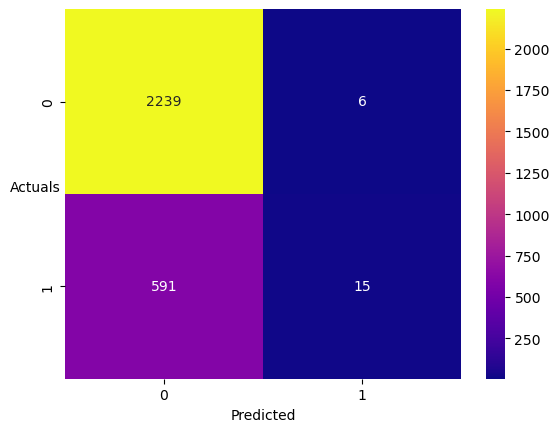

In [209]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_trainClass_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [210]:
print(metrics.classification_report(y_train,y_trainClass_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.791     0.997     0.882      2245
         1.0      0.714     0.025     0.048       606

    accuracy                          0.791      2851
   macro avg      0.753     0.511     0.465      2851
weighted avg      0.775     0.791     0.705      2851



While the model demonstrates decent performance in terms of accuracy and precision, its recall for predicting defaults is significantly low. To further evaluate its stability and reliability, we will test the model on the test dataset and analyze its performance.
##### Checking on test data

In [211]:
X_test_pruned = X_test[['const', 'Profit_after_tax', 'PAT_as_perc_of_total_income',
                        'TOL_to_TNW', 'Current_assets']]

In [212]:
X_train.columns

Index(['const', 'Profit_after_tax', 'PAT_as_perc_of_total_income',
       'TOL_to_TNW', 'Current_assets'],
      dtype='object')

In [213]:
X_test_pruned.head()

,const,Profit_after_tax,PAT_as_perc_of_total_income,TOL_to_TNW,Current_assets
0,1.00,0.52,-0.08,-0.47,2.85
1,1.00,-0.50,-0.66,0.13,-0.62
2,1.00,-0.47,0.01,-0.80,-0.59
3,1.00,-0.11,0.60,1.55,0.19
4,1.00,-0.41,1.48,-0.78,-0.65


In [214]:
X_test_pruned.shape

(1405, 5)

In [215]:
# Predict on the train set
y_test_pred = model.predict(X_test_pruned)

In [216]:
y_testClass_pred=[]
for i in range(0,len(y_test_pred)):
    if np.array(y_test_pred)[i]>0.5:
        a=1
    else:
        a=0
    y_testClass_pred.append(a)

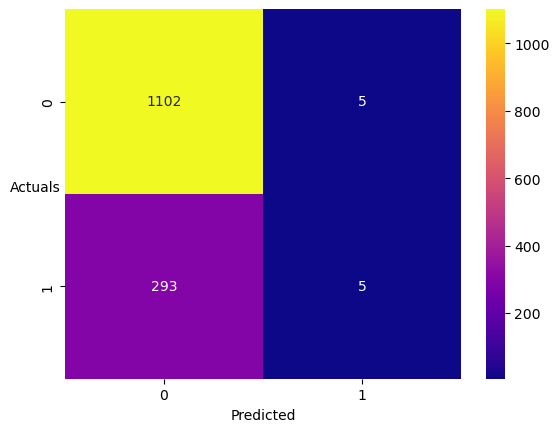

In [217]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_testClass_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [218]:
print(metrics.classification_report(y_test,y_testClass_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.790     0.995     0.881      1107
         1.0      0.500     0.017     0.032       298

    accuracy                          0.788      1405
   macro avg      0.645     0.506     0.457      1405
weighted avg      0.728     0.788     0.701      1405



In [219]:
results = []
accuracy = metrics.accuracy_score(y_test, y_testClass_pred)
precision = metrics.precision_score(y_test, y_testClass_pred)
recall = metrics.recall_score(y_test, y_testClass_pred)

# Append the results as a dictionary
results.append({
    'Model': 'Logit_model',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

Model performance for both test and train data is almost identical, however, recall for default is very poor and to improve it we will use ROC curve to find optimal threhold which could help improve the recall score.
##### Optimal threshold using ROC curve

In [220]:
from sklearn.metrics import roc_curve, roc_auc_score

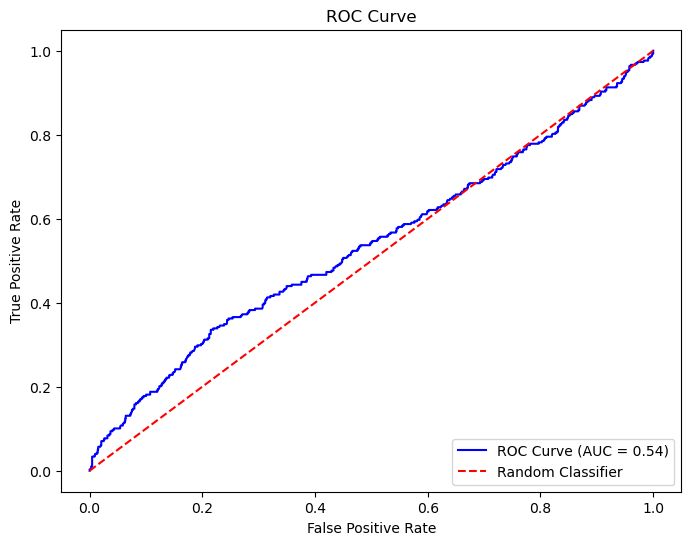

In [221]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_test_pred):.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [222]:
# Calculate Youden's Index and find the optimal threshold
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold Value: {optimal_threshold:.2f}")

Optimal Threshold Value: 0.24


In [223]:
y_testClass_pred=[]
for i in range(0,len(y_test_pred)):
    if np.array(y_test_pred)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_testClass_pred.append(a)

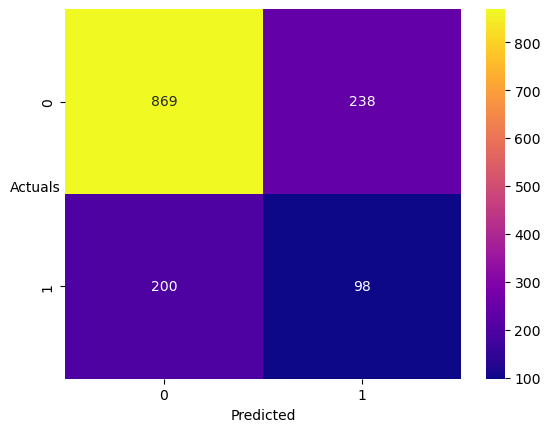

In [224]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_testClass_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [225]:
print(metrics.classification_report(y_test,y_testClass_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.813     0.785     0.799      1107
         1.0      0.292     0.329     0.309       298

    accuracy                          0.688      1405
   macro avg      0.552     0.557     0.554      1405
weighted avg      0.702     0.688     0.695      1405



In [226]:
accuracy = metrics.accuracy_score(y_test, y_testClass_pred)
precision = metrics.precision_score(y_test, y_testClass_pred)
recall = metrics.recall_score(y_test, y_testClass_pred)

# Append the results as a dictionary
results.append({
    'Model': 'Logit_model_optimal',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

By adjusting the prediction threshold to 0.24, we successfully improved the recall score from 0.017 to 0.329. However, this improvement in recall comes at the cost of a slight decline in both precision and accuracy. This trade-off highlights the balance between correctly.
### Building model using Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rf_model =  RandomForestClassifier(random_state=42)
rf_model.fit(X_train_v1, y_train)

RandomForestClassifier(random_state=42)

In [229]:
# accuracy score for model
print('Model accuracy for train data')
print(rf_model.score(X_train_v1, y_train))
print('\n Model accuracy for test data')
print(rf_model.score(X_test, y_test))

Model accuracy for train data
0.9635215713784637

 Model accuracy for test data
0.703202846975089


Accuracy score for test and train data show significant variance meaning model is not stable. We will have to tune the hyperparameters to make the model stable.
##### Tuning Hyperparameters

In [230]:
from sklearn.model_selection import GridSearchCV 

In [231]:
# defining best parameters
best_params = {'n_estimators':[125,150, 175],
              'max_features':[0.45,0.5,0.55],
              'max_depth':[3, 5, 7]}

# defining model
grid_search = GridSearchCV(estimator=rf_model, param_grid=best_params, cv= 3)
grid_search.fit(X_train_v1, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.45, 0.5, 0.55],
                         'n_estimators': [125, 150, 175]})

In [232]:
# getting best parameters
best_params = grid_search.best_params_
best_params

{'max_depth': 3, 'max_features': 0.55, 'n_estimators': 125}

Building model based on optimum hyperparameters.

In [233]:
rf_model = RandomForestClassifier(**best_params, random_state= 42)
rf_model.fit(X_train_v1, y_train)

RandomForestClassifier(max_depth=3, max_features=0.55, n_estimators=125,
                       random_state=42)

In [234]:
# accuracy score for model
print('Model accuracy for train data')
print(rf_model.score(X_train_v1, y_train))
print('\n Model accuracy for test data')
print(rf_model.score(X_test, y_test))

Model accuracy for train data
0.8014731673097159

 Model accuracy for test data
0.7900355871886121


Accuracy score for test and train data are almost similar. We will evaluate the model performance using confusion matrix and classification table.
#### Model Evaluation

In [235]:
rf_train_pred = rf_model.predict(X_train_v1)

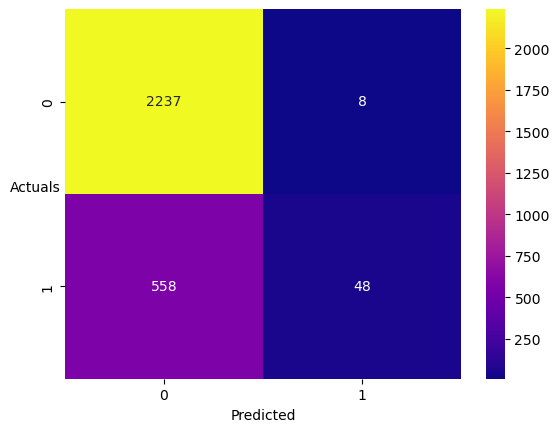

In [236]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,rf_train_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [237]:
print(metrics.classification_report(y_train,rf_train_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.800     0.996     0.888      2245
         1.0      0.857     0.079     0.145       606

    accuracy                          0.801      2851
   macro avg      0.829     0.538     0.516      2851
weighted avg      0.812     0.801     0.730      2851



#### Checking on test data

In [238]:
rf_test_pred = rf_model.predict(X_test)

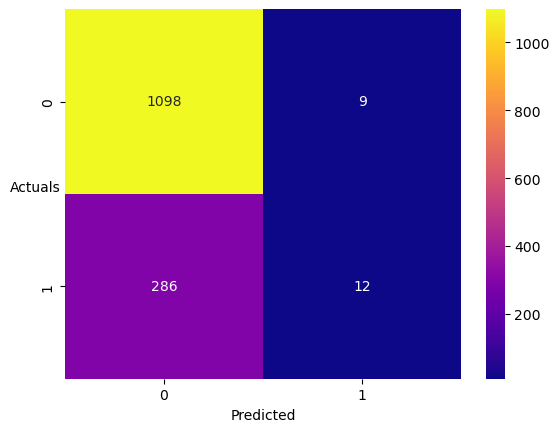

In [239]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,rf_test_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [240]:
print(metrics.classification_report(y_test,rf_test_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.793     0.992     0.882      1107
         1.0      0.571     0.040     0.075       298

    accuracy                          0.790      1405
   macro avg      0.682     0.516     0.478      1405
weighted avg      0.746     0.790     0.711      1405



In [241]:
accuracy = metrics.accuracy_score(y_test, rf_test_pred)
precision = metrics.precision_score(y_test, rf_test_pred)
recall = metrics.recall_score(y_test, rf_test_pred)

# Append the results as a dictionary
results.append({
    'Model': 'RF_model',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

Model performance for both test and train data is almost identical, however, recall for default is very poor and to improve it we will use ROC curve to find optimal threhold which could help improve the recall score.
##### Optimal threshold using ROC curve

In [242]:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [243]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

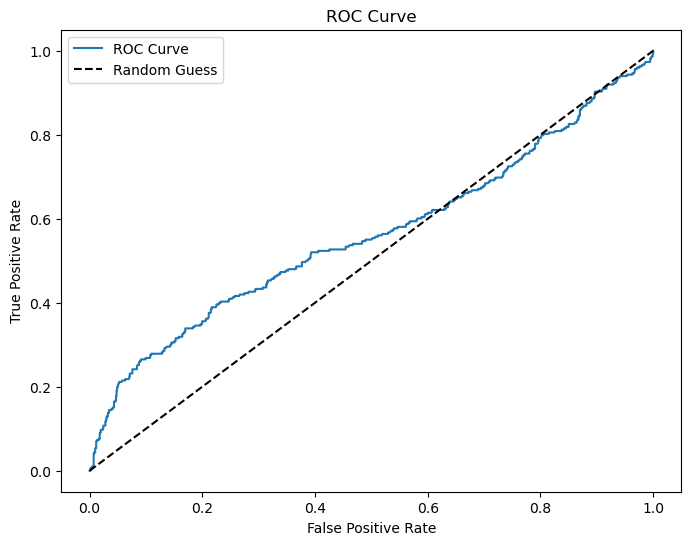

In [244]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [245]:
# Calculate Youden's J statistic
youden_index = tpr - fpr
optimal_index = youden_index.argmax()  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

print(f"Optimal Threshold Value: {optimal_threshold:.2f}")

Optimal Threshold Value: 0.27


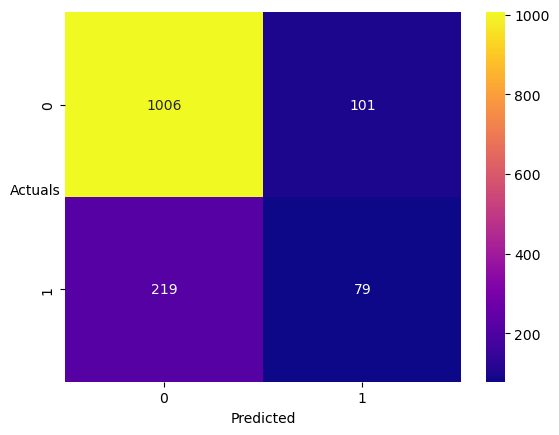

In [246]:
# Apply the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test, y_pred_optimal)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [247]:
# Apply the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Classification report
print(metrics.classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1107
         1.0       0.44      0.27      0.33       298

    accuracy                           0.77      1405
   macro avg       0.63      0.59      0.60      1405
weighted avg       0.74      0.77      0.75      1405



In [248]:
accuracy = metrics.accuracy_score(y_test, y_pred_optimal)
precision = metrics.precision_score(y_test, y_pred_optimal)
recall = metrics.recall_score(y_test, y_pred_optimal)

# Append the results as a dictionary
results.append({
    'Model': 'RF_model_optimal',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

By adjusting the prediction threshold to 0.27, we successfully improved the recall score from 0.04 to 0.27. However, this improvement in recall comes at the cost of a slight decline in both precision and accuracy. This trade-off highlights the balance between correctly.

## Model Comparision

In [249]:
results_df = pd.DataFrame(results)

In [250]:
results_df

,Model,Accuracy,Precision,Recall
0,Logit_model,0.79,0.50,0.02
1,Logit_model_optimal,0.69,0.29,0.33
2,RF_model,0.79,0.57,0.04
3,RF_model_optimal,0.77,0.44,0.27


On evaluating all the models based on combination of Accuracy, Precision and Recall scores Random Forest model optimised for threshold is performing the best as it is prodiding the best balance for all the three metrics wherein other models are performing significantly poorly on 1 of the 3 metrics. Moving forward we will take this model as the final model.
## Most important features

In [251]:
feature_importance = pd.DataFrame(rf_model.feature_importances_.transpose(), columns = ['imp'], index = X_train_v1.columns)
feature_importance.sort_values(by = 'imp', ascending=False).head()

,imp
TOL_to_TNW,0.15
PBT_as_perc_of_total_income,0.12
Cash_profit_as_perc_of_total_income,0.10
PAT_as_perc_of_total_income,0.08
Reserves_and_funds,0.07


On examining the most important features for RF_model_optimal, TOL_to_TNW emerges as the most influential, contributing 15% of the model's total importance. TOL_to_TNW reflects the proportion of total liabilities to a company's net worth, indicating the extent to which its assets are financed by debt rather than equity. A higher value signifies greater financial leverage and potentially increased financial risk, making it a crucial factor for predicting financial performance and identifying default risks.

Similarly, other significant features, such as PBT_as_perc_of_total_income, Cash_profit_as_perc_of_total_income, PAT_as_perc_of_total_income, and Reserves_and_funds, provide insights into a company's profitability and cash flow. These metrics play a vital role in assessing a company's ability to generate income, maintain liquidity, and service its liabilities effectively. Together, these features offer a comprehensive view of a company's financial health, aiding in accurate predictions and proactive risk management.
## Conclusion
### Key Takeaways
1. The dataset comprises over 50 attributes for each company. However, upon analysis, it was observed that nearly 50% of the companies had more than 10% of their data missing. Further investigation revealed that these companies with higher proportions of missing data exhibited a significantly higher likelihood of default.
2. For the classification models developed, the Random Forest model with an adjusted threshold emerged as the best performer, offering the most balanced trade-off between accuracy, precision, and recall—key metrics for evaluating model effectiveness. Models using the standard threshold performed poorly in terms of recall, often misclassifying nearly all defaulters as non-defaulters, which significantly undermines the model's utility. Among the models tested, the Logistic Regression model with an adjusted threshold had the weakest performance, with the lowest accuracy and precision scores. This indicates that it struggled to classify companies correctly and exhibited the highest rate of misclassification for both defaulters and non-defaulters, which could lead to negative consequences if deployed in real-world scenarios.
3. The primary goal of this project is to classify companies based on their ability to meet future financial obligations. To achieve this, key factors should include metrics that offer insights into a company's income-generating capacity and cash flow stability. Upon analyzing the most significant features in the best-performing model, Total Liabilities to Total Net Worth (TOL_to_TNW) emerged as the top contributor, indicating the degree of financial leverage and risk associated with the company.
Other important features include:
* Profit Before Tax (PBT) as a Percentage of Total Income
* Profit After Tax (PAT) as a Percentage of Total Income
* Cash Profit as a Percentage of Total Income
* Reserves and Surplus

    These factors collectively provide a comprehensive understanding of a company's current financial health, operational efficiency, and capacity to generate income. By incorporating these features, the model ensures a more accurate prediction of a company's ability to meet its financial obligations, thereby aiding in effective decision-making.
### Key Recommendations
1. Companies with over 10% missing data have demonstrated a significantly higher probability of default. It is recommended to conduct a thorough investigation to determine whether this non-disclosure is incidental or a deliberate attempt to withhold critical information. Establishing the intent behind these gaps in data can provide valuable insights into patterns of non-compliance or potential fraudulent activity. This investigation will not only enhance the reliability of the dataset but also help refine the model's ability to identify high-risk companies effectively.
2. We have successfully built models using logistic regression and random forest and identified the best-performing model. However, there is considerable scope for improvement, especially regarding precision and recall. To address these limitations and enhance model performance, we recommend the following:
* Approximately 8% of the dataset was missing, which is significant, given that some variables were derived from others. Furthermore, the possibility of deliberate non-disclosure raises concerns about the reliability of the data. To ensure completeness and trustworthiness, it is recommended that future datasets are sourced directly from audited financial statements of the companies. This would eliminate doubts about data integrity and provide a more robust foundation for model development.
* Logistic regression, which was a mandatory model for this project, is highly sensitive to outliers. Consequently, an outlier treatment process was applied to the dataset, affecting over 8% of the data (based on conservative thresholds at the 5th and 95th percentiles). This resulted in over 16% of the data being imputed, likely impacting model performance. Given the high prevalence of outliers and missing data, we recommend exploring alternative modeling techniques such as decision trees, bagging, and boosting methods. These models are less sensitive to outliers and better equipped to handle missing data, potentially yielding improved results.
* Features related to income generation, cash flows, and financial standing were identified as the most important predictors of default. To enhance predictive power, we recommend collecting financial records from the past few years in addition to the current year. This historical data can be used to build regression models that forecast future performance, which can then be integrated into the classification model. This approach will likely provide a more comprehensive understanding of the company's financial trajectory and improve overall model accuracy.

# Problem 2
## Background Information
Investing in financial markets involves substantial risk, primarily driven by potential price fluctuations of assets. These swings often result from unforeseen economic events or geopolitical developments, which can drastically impact investor sentiment and market dynamics.
## Business Context
Given the significant risks inherent in financial markets, it is crucial for investors to assess and understand the risks they are undertaking. This understanding enables them to align their investment strategies with their financial objectives, fostering informed decision-making and portfolio optimization.
## Problem Statement
The objective of this is to develop a robust risk evaluation framework that leverages historical market data by quantifying and predicting potential risks, the framework aims to guide investors in selecting investment strategies that balance risk and reward effectively, ultimately supporting their financial goals.
## Data Dictionary
* Date: Week starting date.
* ITC Limited: Weekly closing price for ITC limited's stocks.
* Bharti Airtel: Weekly closing price for Bharti Airtel's stocks.
* Tata Motors: Weekly closing price for Tata Motors's stocks.
* DLF Limited: Weekly closing price for DLF Limited's stocks.
* Yes Bank: Weekly closing price for Yes Bank's stocks.
## Loading Data

In [252]:
stock_data = pd.read_csv('D:/Kartik/GL MDS/Study_data/Assingnment_files/FRA/Market_Risk_Data_coded.csv')

## Data Overview

In [253]:
data_overview(stock_data)

a glimpse of the data
----------------------------------------------------------------------------


,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175




shape of the dataset
----------------------------------------------------------------------------


(418, 6)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
ITC Limited,418.00,278.96,75.11,156.00,224.25,265.50,304.00,493.00
Bharti Airtel,418.00,528.26,226.51,261.00,334.00,478.00,706.75,1236.00
Tata Motors,418.00,368.62,182.02,65.00,186.00,399.50,466.00,1035.00
DLF Limited,418.00,276.83,156.28,110.00,166.25,213.00,360.50,928.00
Yes Bank,418.00,124.44,130.09,11.00,16.00,30.00,249.75,397.00




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


None



missing values
----------------------------------------------------------------------------


Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of duplicate rows: 0


value counts for Date
----------------------------------------------------------------------------
Date
28-03-2016    1
28-03-2022    1
13-09-2021    1
06-09-2021    1
30-08-2021    1
             ..
05-11-2018    1
29-10-2018    1
22-10-2018    1
15-10-2018    1
25-03-2024    1
Name: count, Length: 418, dtype: int64




##### Key Obeservations
1. There are 418 rows and 6 columns in the dataset.
2. Datatype for date column is object which we will have to convert to date time format and for rest five columns datatype is integer type meaning there is no junk data in these columns.
3. On cheking statistical summary there is nothing unusual in the data.
4. Column names have spaces in them which we will have to remove we will do so during data pre-processing.
5. There are no missing values or duplicates in data.
## Data Pre-processing
### Fixing messy column names (containing spaces) for ease of use

In [254]:
stock_data.columns = stock_data.columns.str.replace(' ', '_')

In [255]:
stock_data.columns

Index(['Date', 'ITC_Limited', 'Bharti_Airtel', 'Tata_Motors', 'DLF_Limited',
       'Yes_Bank'],
      dtype='object')

## Exploratory Data Analysis
### plotting price trend over time for different companies

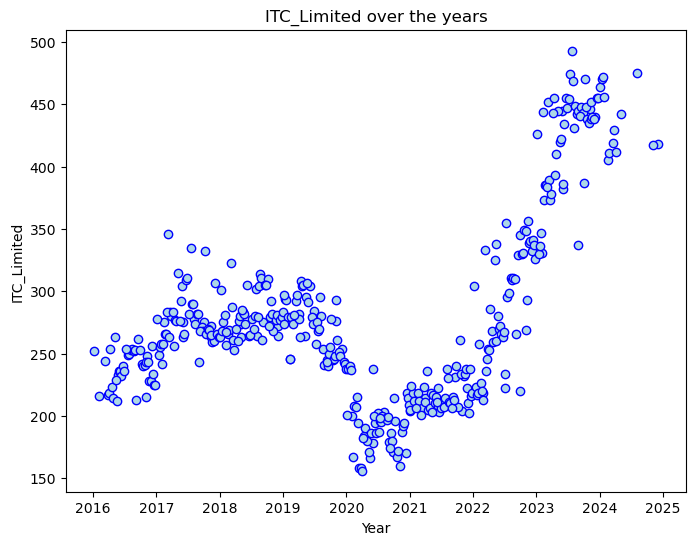

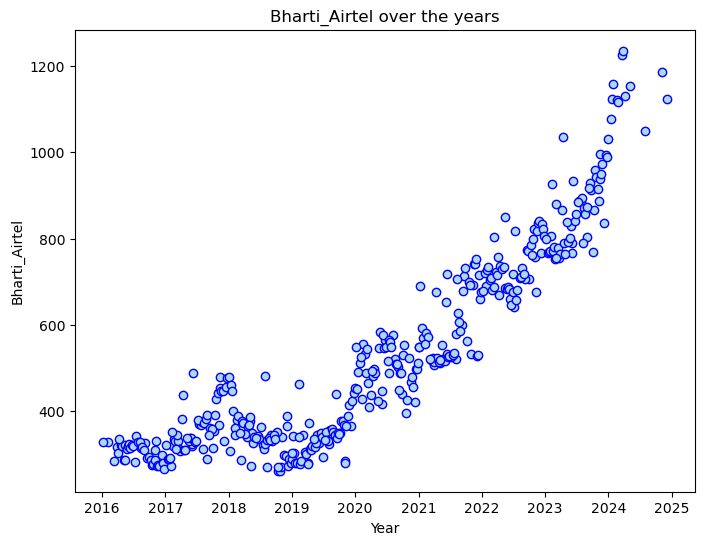

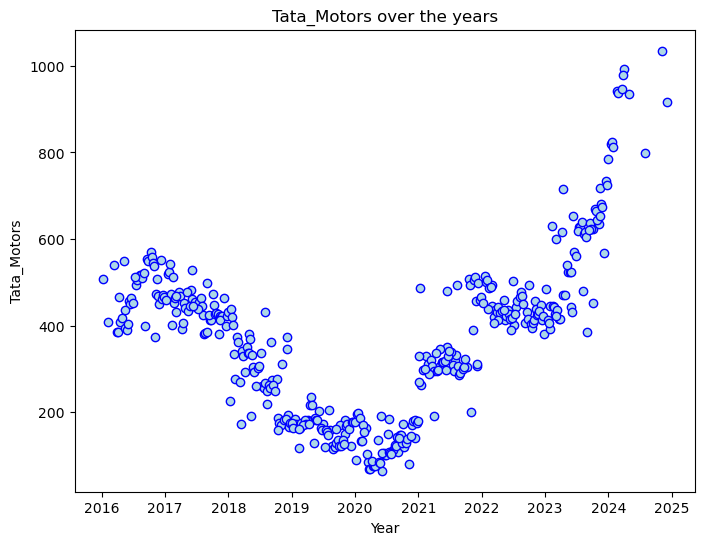

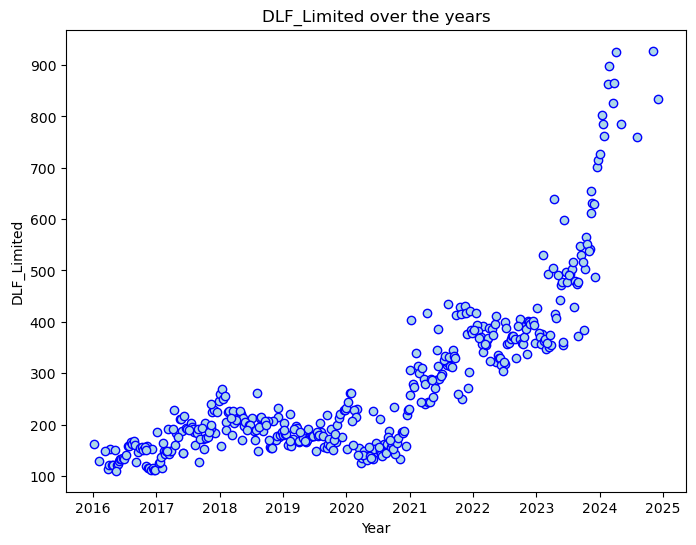

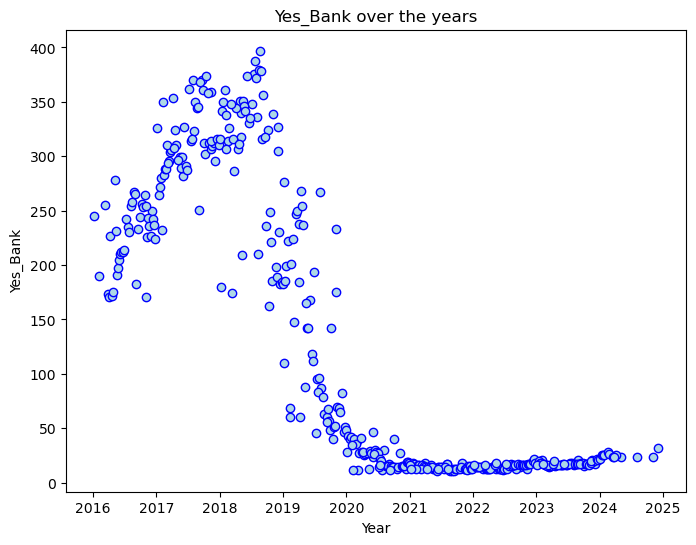

In [256]:
for column in stock_data.columns:
    if column not in ['Date', 'dates']:
        plt.figure(figsize = (8, 6))
        stock_data['dates'] = [pd.to_datetime(d) for d in stock_data['Date']]
        plt.scatter(stock_data['dates'], stock_data[column], edgecolors='b', color = 'lightblue')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.title(f'{column} over the years')
        plt.show()

##### Key Observations
1. Amongst the five stocks the trend for all except Yes Bank is upward while Yes Bank is showing a downward trend.
2. In terms of the scattering of markers for Yes Bank markers appear most scattered followed by ITC Limited and for DLF Limited it appears to be least scattered.
## Analyzing Returns
### Taking Logarithms and Differences

In [257]:
stock_returns = np.log(stock_data.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [258]:
stock_returns.shape

(418, 5)

In [259]:
stock_returns.head()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.00,-0.05,0.00,0.06,-0.01
2,-0.01,0.02,-0.03,-0.01,0.00
3,0.04,0.04,0.09,0.02,0.01
4,-0.04,-0.00,0.02,0.00,0.02


### Calculating Mean

In [260]:
pd.options.display.float_format = '{:.4f}'.format
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC_Limited      0.0016
Bharti_Airtel    0.0033
Tata_Motors      0.0022
DLF_Limited      0.0049
Yes_Bank        -0.0047
dtype: float64

### Calculating Standard Deviation

In [261]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

ITC_Limited     0.0359
Bharti_Airtel   0.0387
Tata_Motors     0.0605
DLF_Limited     0.0578
Yes_Bank        0.0939
dtype: float64

#### Creating a dataframe with weekly average return and volatility

In [262]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
ITC_Limited,0.0016,0.0359
Bharti_Airtel,0.0033,0.0387
Tata_Motors,0.0022,0.0605
DLF_Limited,0.0049,0.0578
Yes_Bank,-0.0047,0.0939


#### Plotting for average returns and volatility

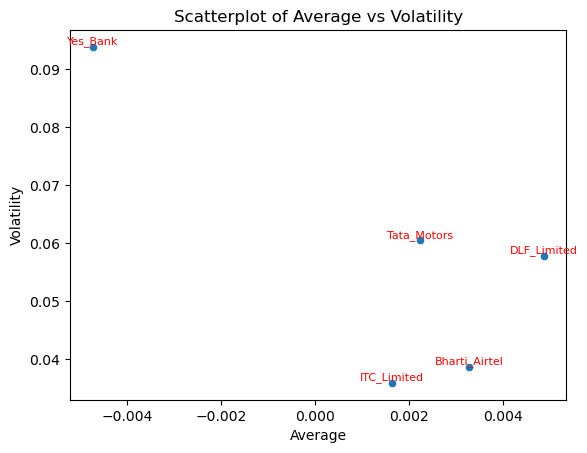

In [263]:
sns.scatterplot(data=df, x='Average', y='Volatility')
plt.title("Scatterplot of Average vs Volatility")
plt.xlabel("Average")
plt.ylabel("Volatility")
# Annotate each marker
for i in range(len(df)):
    plt.annotate(
        df.index[i],  # Index value
        (df['Average'][i], df['Volatility'][i]),  # Marker position
        fontsize=8, color='red', 
        ha='center',  # Center horizontally
        va='bottom'   # Center vertically
    )
plt.show()

In [264]:
df.sort_values(by='Volatility')

,Average,Volatility
ITC_Limited,0.0016,0.0359
Bharti_Airtel,0.0033,0.0387
DLF_Limited,0.0049,0.0578
Tata_Motors,0.0022,0.0605
Yes_Bank,-0.0047,0.0939


Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus for the data we have here, we are only left few stocks:
* ITC_Limited
* Bharti_Airtel
* DLF_Limited
* Tata Motors

To identify the stocks which give the best balance between risk and return we can evaluate the sharpe ratio. For sharpe ratio we need risk free return which is normally considered to be rate for government bonds which currently is 5% per annum.
#### Calculating Sharpe Ratio

In [265]:
sharpe_value = []
# converting annual risk free return to weekly
risk_free_return = 5/(100*52)
# Convert risk-free return to log return (log(1 + r))
log_risk_free_return = np.log(1 + risk_free_return)
# Calculate Sharpe ratio for each stock and store the results
sharpe_ratios = (df['Average'] - risk_free_return) / df['Volatility']

# Convert the Sharpe ratios to a DataFrame
sharpe_ratio_df = pd.DataFrame(sharpe_ratios, columns=["Sharpe_Ratio"])

In [266]:
sharpe_ratio_df.sort_values(by='Sharpe_Ratio', ascending= False)

,Sharpe_Ratio
DLF_Limited,0.0675
Bharti_Airtel,0.0596
Tata_Motors,0.0210
ITC_Limited,0.0187
Yes_Bank,-0.0607


Evaluating stocks solely based on average return and volatility can lead to misleading conclusions. For instance, ITC Limited shows the lowest volatility, followed by Bharti Airtel, which might initially suggest they are the best-performing stocks. However, this simplistic assessment overlooks the balance between risk and return. When we incorporate Sharpe's Ratio, which evaluates performance relative to risk, a different picture emerges. DLF Limited stands out as the best-performing stock, followed by Bharti Airtel. Interestingly, despite its low volatility, ITC Limited ranks as the second-worst in terms of Sharpe's Ratio, highlighting the importance of a comprehensive evaluation that accounts for both risk and return.
## Conclusion
The Market Risk Analysis provided valuable insights into the risk-return dynamics of a portfolio. By incorporating statistical measures and the Sharpe ratio, we were able to move beyond simplistic metrics like mean return and volatility, enabling a more comprehensive evaluation of portfolio performance. Key insights and actionable recommendations are as follows:
#### Key Insights
1. The analysis underscores the importance of considering both risk and return when evaluating stocks. Solely relying on metrics like average return or volatility can be misleading, as they fail to account for the risk-adjusted performance of investments.
2. By integrating the Sharpe Ratio, we identified that DLF Limited offers the best risk-adjusted returns, despite having higher volatility compared to other stocks like ITC Limited and Bharti Airtel. This demonstrates the necessity of incorporating comprehensive measures for informed decision-making.
3. Although ITC Limited has the lowest volatility, it performs poorly in terms of risk-adjusted returns. This highlights that low risk does not necessarily translate to high performance if returns are not proportionately higher.
4. Bharti Airtel emerges as a strong contender with a balanced performance, making it a viable choice for investors seeking moderate risk and returns.
#### Key Recommendations
1. Rather than relying solely on standalone metrics such as average return or volatility incorporating risk-adjusted measures like the Sharpe Ratio to gain a complete understanding of stock performance could be more beneficial.
2. DLF Limited, with the highest Sharpe Ratio, should be considered a top priority for inclusion in the portfolio, as it offers the best balance of return relative to risk.
3. ITC Limited’s lower Sharpe Ratio suggests it may not add substantial value to the portfolio. Reassess its inclusion, especially if there are other stocks offering better risk-adjusted returns.
4. While focusing on high Sharpe Ratio stocks, it recommended that the portfolio remains diversified to minimize exposure to stock-specific risks and maintain a balance of industries.
5. Continuously monitoring the portfolio performance and market conditions and adjusting stock allocations based on evolving Sharpe Ratios and changing economic scenarios could be beneficail to sustain optimal risk-adjusted returns.